In [2]:
%pip install spacy
%pip install nltk
%pip install xlrd==1.2.0
%pip install somoclu
%pip install gradio
%pip install streamlit
%pip install urllib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [3]:
import pandas as pd #Libreria de dataframes
import os #Libreria de windows/consola
import spacy #Libreria lenguaje español
import numpy as np #Libreria de calculos
import pickle #Libreria de guardado de archivos
import re #Libreria para normalizar texto, eliminar parentecis, comas, etc
import itertools

In [4]:
#Librerias para graficos

import matplotlib #Libreria de graficos
from matplotlib import pyplot as plt #Libreria de Graficos
import matplotlib.pyplot as plt #Libreria de graficos
import matplotlib.colors as mcolors #Libreria de graficos
import seaborn as sb #Libreria de graficos
import seaborn as sns #Libreria de graficos

In [5]:
#Libreria para NLP

#from wordcloud import WordCloud, STOPWORDS #Libreria de stopwords y nuve de palabras
import nltk
from nltk.stem.snowball import SnowballStemmer #Libreria de stemmer para acortar palabras
from sklearn.decomposition import LatentDirichletAllocation #Libreria para clastering
from sklearn.model_selection import GridSearchCV #Libreria para encontrar mejor modelo
from scipy.sparse import csr_matrix #Libreria para Crear matriz
from sklearn.feature_extraction.text import TfidfVectorizer #Libreria para vectorizacion de palabras
import spacy #Libreria lenguaje en español
spacy.cli.download('es_core_news_md') #Descarga libreria NLP español
nlp = spacy.load('es_core_news_md') #Cargar

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [6]:
#CARGAR EXCEL DATA
df = pd.read_excel(open("tickets_esval.xlsx","rb"))
df.head(2)

,Código,Fecha de registro,Estado,Título,Descripción,Fecha estimada resolución,Técnico de 2ª línea,SLA,Prioridad,Grupo,...,Tiempo de resolución (horas / minutos),Firma registro,Servicio,Cerrada / Revocada por,Cliente,Solución para el usuario,Caducada,Email,3. Correo electronico,2. Rut (con punto y guion)
0,REQ 2022-006272,2022-03-24 21:37:27,Asignada a un grupo,finalizar Reposición servicio 1115745,se solicita finalizar reposición de fecha 20-0...,2022-03-31 18:04:00,"FLORES CONEJEROS, NATALIA IVON",SLA SIS 2 / 40,Media,Sistema Comercial 4J,...,NaN,"USER, SETUP",Sistema Comercial 4J,NaN,NaN,NaN,No,NaN,NaN,NaN
1,REQ 2022-006271,2022-03-24 19:54:28,Resuelta,cuenta de VPN bloqueada,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,2022-03-25 03:54:00,"BALLEN , JUAN DIEGO - MDA",SLA Infra 2/8 24x7,Baja,Mesa Ayuda Informatica,...,0h 07m,"BALLEN , JUAN DIEGO - MDA",Restaurar contraseña,NaN,NaN,Usuario indica que pudo ingresar a VPN,No,NaN,NaN,NaN


In [7]:
#Tipos de tickets existentes
df.Tipo.value_counts()

TI - Requerimiento                            11000
TI - Desbloqueo y/o Reinicio de Claves         6827
TI - Incidencia                                3823
TI - Creación y/o modificación de cuentas      2656
ADM - Requerimientos                           1476
ADM - Vehículos Para Transporte                1342
ADM - Reparaciones                              499
PREV - Requerimientos                           305
TI - RFC                                        104
TI - Soporte                                     80
ING - Proyectos                                  27
ADM - Compras                                    16
REQ - UNegocios                                   9
TI - Trabajo Administrativo                       1
TI - Solicitud Minutos y Megas Adicionales        1
PREV - Incidentes                                 1
Name: Tipo, dtype: int64

In [8]:
#Categorias existentes
#df['Categoría'].unique()
df.Categoría.value_counts().iloc[1:20]

/Consulta General                              2661
/Cuenta VPN                                    1328
/Llamada Cortada                               1326
/SC4J                                          1221
/PC                                            1056
/Error Plataforma                               904
/Consulta por Ticket                            798
/Notebook                                       795
/Pool Bustamante                                685
/Cuenta de Correo                               463
/Solicitud de Acceso                            422
/Sistema SAP                                    376
/Single Sing On SAP                             371
/Sistema Comercial 4J/Gestión Administrador     340
/Telefonía Móvil                                333
/SIGEC                                          333
/Alta Personal Externo                          327
/Servicios de Impresión                         315
/Otras Reparaciones                             306
Name: Catego

In [9]:
#ELIMINA ELEMENTOS VACIOS (N/A)
df = df.dropna(subset=["Descripción"])
#ELIMINA DUPLICADOS
df = df.drop_duplicates(subset='Descripción',keep='first')
aux=df['Descripción'].unique().tolist()
df_sd = pd.DataFrame(aux,columns=['Descripción'])
#sd = sd.dropna(subset=["Descripción"])
#df_sd['Tipo']=df['Tipo']
#df_sd['Categoria']=df['Categoría']

In [10]:
df_sd

,Descripción
0,se solicita finalizar reposición de fecha 20-0...
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...
2,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...
3,Nombre: Gisella CarrascoEmail: gcarrasco.incos...
4,Nombre: Carlos GallardoUsuario: cgallardoEmail...
...,...
26477,"ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA..."
26478,estimado envío solicitud para revisión de celu...
26479,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...
26480,Descripción: Se solicita una Planta elevadora...


In [11]:
#Eliminar Ruido
def ruido(text):
  #Corchetes y contenido
  text = re.sub('\[[^]]*\]', '', str(text))
  #Parentesis y contenido
  text = re.sub('\([^)]*\)', '', str(text))
  #re.compile(r"\[.*\]")
  return text

filas = len(df_sd['Descripción'])

rr=[]
#Añadir descripciones sin ruido a dataframe
for r in range(filas):
  rr.append(ruido(df_sd['Descripción'][r]))
df_sd["Description"]=rr

In [12]:
df_sd.head(2)

,Descripción,Description
0,se solicita finalizar reposición de fecha 20-0...,se solicita finalizar reposición de fecha 20-0...
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,Nombre: Daniel RodriguezEmail: drodriguez.shcc...


In [13]:
#Tamaño de los textos a dataframe
#Variable para almacenar el largo de cada documento
largo = []
#Recorriendo documentos
for x,y in enumerate(df_sd['Descripción']):
  #Agregando el largo de los documentos a la variable largo
  #print(x,len(y))
  largo.append(len(y))
  #break

df_sd['largo']=largo
long=[]
for x,y in enumerate(df_sd['Description']):
  #Agregando el largo de los documentos a la variable largo
  #print(x,len(y))
  long.append(len(y))
  #break

df_sd['length']=long
df_sd.head(2)

,Descripción,Description,largo,length
0,se solicita finalizar reposición de fecha 20-0...,se solicita finalizar reposición de fecha 20-0...,52,52
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,165,165


In [14]:
#df_sd["Descripción"].reset_index(drop=True)
df = df.reset_index(drop=True)
areeglo=[]
for x,y in enumerate(df_sd['Descripción']):
  #Agregando el largo de los documentos a la variable largo
  #print(x,len(y))
  if df_sd["Descripción"][x] == df['Descripción'][x]:
    #print(y)
    areeglo.append( df["Tipo"][x])

In [15]:
df_sd["Tipo"]=areeglo

In [16]:
#tunicos = df.value_counts(['Tipo']).rename_axis('Tipos').reset_index(name='Counts')
#tunicos
#Tipos de tickets existentes
df.Tipo.value_counts()

TI - Requerimiento                            9446
TI - Desbloqueo y/o Reinicio de Claves        6721
TI - Incidencia                               3684
TI - Creación y/o modificación de cuentas     2533
ADM - Requerimientos                          1467
ADM - Vehículos Para Transporte               1292
ADM - Reparaciones                             495
PREV - Requerimientos                          303
TI - RFC                                        86
TI - Soporte                                    43
ING - Proyectos                                 27
ADM - Compras                                   16
REQ - UNegocios                                  8
TI - Trabajo Administrativo                      1
TI - Solicitud Minutos y Megas Adicionales       1
PREV - Incidentes                                1
Name: Tipo, dtype: int64

C:\Users\farayal\AppData\Local\Temp/ipykernel_21380/3853017529.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Tipo'],1).hist(orientation='vertical')


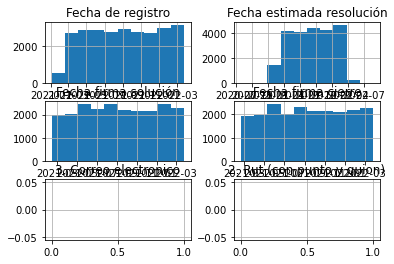

In [17]:
#Grafico de histograma
df.drop(['Tipo'],1).hist(orientation='vertical')
plt.show()

In [18]:
#Categorias existentes

#unicos = df.value_counts(['Categoría']).rename_axis('Categorias').reset_index(name='Counts')
#unicos
#df['Categoría'].unique()

df.Categoría.value_counts().iloc[1:20]

/Consulta General                              2370
/Cuenta VPN                                    1292
/SC4J                                          1204
/PC                                            1020
/Error Plataforma                               841
/Consulta por Ticket                            790
/Notebook                                       748
/Pool Bustamante                                668
/Cuenta de Correo                               453
/Solicitud de Acceso                            415
/Sistema SAP                                    369
/Single Sing On SAP                             362
/Llamada Cortada                                349
/Sistema Comercial 4J/Gestión Administrador     336
/Telefonía Móvil                                332
/SIGEC                                          332
/Servicios de Impresión                         306
/Otras Reparaciones                             304
/Entre 3 y 10 Kilos                             301
Name: Catego

In [19]:
#Funciones de limpieza de datos

#ELIMINA PALABRAS QUE NO EXISTEN EN CODIGO ASCII
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', str(word)).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#CONVIERTE CARACTERES A MINUSCULA
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = str(word).lower()
        new_words.append(new_word)
    return new_words

#REMUEVE CARACTERES NO ALFANUMERICOS
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', str(word))
        if new_word != '':
            new_words.append(new_word)
    return new_words

#TRANSFORMA NUMEROS A LETRAS (INGLES)
#import inflect
#def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
#    p = inflect.engine()
#    new_words = []
#    for word in words:
#        if str(word).isdigit():
#            new_word = p.number_to_words(str(word))
#            new_words.append(new_word)
#        else:
#            new_words.append(str(word))
#    return new_words



In [20]:
#VECTORIZACION
spanishstemmer = SnowballStemmer('spanish')
def normalize(text):
  #Tokenizacion spacy
  doc = nlp(text)
  #Lemmatizacion | Eliminacion de caracteres |Eliminacion de palabras de parada
  words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
  #Texto a minusculas | Eliminacion de caracteres alfanumericos
  lexical_tokens = [t.lower() for t in words if len(t) > 2 and t.isalpha()]
  #Transformacion de numero a letras - Ingles
  #lexical_tokens=replace_numbers(lexical_tokens)
  #Elimina palabras que no se encuentran en el codigo ASCII
  #lexical_tokens=remove_non_ascii(lexical_tokens)
  #Stemmer
  stema = [spanishstemmer.stem(token) for token in lexical_tokens]
  return stema

spanish_stemmer = nltk.stem.SnowballStemmer('spanish')

In [21]:
#Agregando al dataframe los elementos normalizados
text = []
for x in range(len(df_sd['Description'])):
  #print(x)
  text.append(normalize(df_sd['Description'][x]))

df_sd['text'] = text

In [22]:
df_sd.head(2)

,Descripción,Description,largo,length,Tipo,text
0,se solicita finalizar reposición de fecha 20-0...,se solicita finalizar reposición de fecha 20-0...,52,52,TI - Requerimiento,"[solicit, finaliz, reposicion, fech]"
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,165,165,TI - Desbloqueo y/o Reinicio de Claves,"[nombr, daniel, rodriguezemail, reset, desbloq..."


In [23]:
#Stop words
nlp.Defaults.stop_words.add("nombre")
nlp.Defaults.stop_words.add("nombr")
nlp.Defaults.stop_words.add("hola")
nlp.Defaults.stop_words.add("usuario")
nlp.Defaults.stop_words.add("usuari")
nlp.Defaults.stop_words.add("usuaria")
nlp.Defaults.stop_words.add("saludo")
nlp.Defaults.stop_words.add("saludar")
nlp.Defaults.stop_words.add("gracias")
nlp.Defaults.stop_words.add("gracia")
nlp.Defaults.stop_words.add("graci")
nlp.Defaults.stop_words.add("adjuntar")
nlp.Defaults.stop_words.add("favor")
nlp.Defaults.stop_words.add("gracia")
nlp.Defaults.stop_words.add("solicita")
nlp.Defaults.stop_words.add("solicito")
nlp.Defaults.stop_words.add("solicit")
nlp.Defaults.stop_words.add("cccccc")
nlp.Defaults.stop_words.add("saludo")
nlp.Defaults.stop_words.add("salud")
nlp.Defaults.stop_words.add("estimado")
nlp.Defaults.stop_words.add("estimada")
nlp.Defaults.stop_words.add("estim")
nlp.Defaults.stop_words.add("santo")
nlp.Defaults.stop_words.add("santiago")
nlp.Defaults.stop_words.add("viña")
nlp.Defaults.stop_words.add("sant")
nlp.Defaults.stop_words.add("viñ")
nlp.Defaults.stop_words.add("san")
nlp.Defaults.stop_words.add("sant")

In [24]:
#VECTORIZACION

#Ajuste de parametros de vectorizacion
vectorizer_tfidf = TfidfVectorizer(
                      analyzer='word',
                      tokenizer= normalize,
                      lowercase= True,
                      stop_words=nlp.Defaults.stop_words,
                      min_df=1, #Elimina palabras que aparecen menos de 3 veces
                      max_df=0.98) #Elimina palabras que aparecen en el 95% de los textos

#El ajuste, realiza la normalizacion, eliminacion de stop-words y sin relevancia, ademas de crea el vocabulario.(Aplica los parametros establecidos)

In [25]:
#CREANDO VECTOR
count_train_tfidf = vectorizer_tfidf.fit(df_sd['Descripción'])

C:\Users\farayal\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\farayal\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adjunt', 'hol', 'santiag'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [26]:
#CREANDO BOLSA DE PALABRAS
bag_of_wors_idf = vectorizer_tfidf.transform(df_sd['Descripción'])

In [27]:
#Gruardar modelo de vectorizacion
pickle.dump(count_train_tfidf, open("tfidf_7_vector_topics.pk", 'wb'))

In [28]:
#Guardar bolsa de palabras o diccionario
pickle.dump(bag_of_wors_idf, open("bag_of_7_V2_words.pk", 'wb'))

In [29]:
#count_train_tfidf.transform(df_sd['Descripción'])

In [30]:
#Prueba de modelo de vectorizacion
#opo=normalize("HOLA A TODOS COMO ESTAN LOS COMPAS")
#count_train_tfidf.transform(opo)

<2x16630 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [31]:
#Palabras con pesos por documento 
name_doc = []
for i in range(len(df_sd['Descripción'])):
  name_doc.append('Doc '+str(i))

df_coun_vectorize_tfidf = pd.DataFrame(bag_of_wors_idf.toarray(),columns=vectorizer_tfidf.get_feature_names(),index=name_doc)

In [32]:
df_coun_vectorize_tfidf.head(3)

,aaaa,aacun,aacunabloque,aacunaemail,aadjunt,aal,aalegri,aalegriabloque,aalegriaemail,aalfaroemail,...,zuñug,zzunig,zzunigaemail,zzunigagbloque,zzunigu,zzuñigabloque,zzuñigaemail,àasoc,àre,ùltim
Doc 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
cols = df_coun_vectorize_tfidf.columns[:-1].tolist()
#cols
N=10
a=df_coun_vectorize_tfidf[cols].to_numpy().argsort()[:,:-N-1:-1]
c = np.array(cols)[a]
#a


In [34]:
#d = df[cols].to_numpy()[np.arange(a.shape[0])[:, None], a]
#df1 = pd.DataFrame(c).rename(columns=lambda x : f'max_{x+1}_col')
#c

In [35]:
df_coun_vectorize_tfidf.iloc[0][0]

0.0

In [36]:
ar1=[]
ar2=[]
for pos,x in enumerate(c):
    ar2=[]
    for po,y in enumerate(x):
        #print(df_coun_vectorize_tfidf[pos])
        ar2.append(df_coun_vectorize_tfidf.iloc[pos][y])
    ar1.append(ar2)
dddd=pd.DataFrame(ar1)        

In [37]:
#ar1

In [38]:
#import numpy
#ar=numpy.array(ar1)
##numpy.ndarray
#type(ar)

In [39]:
#import somoclu
#for x in range(10):
#    som = somoclu.Somoclu(100,60,maptype="toroid",compactsupport=False)
#    som.train(ar)
#    som.view_umatrix(bestmatches=False)

In [40]:
#Palabra y peso dominante por documento
df_count_vectorize_weight_tfidf = pd.DataFrame(np.amax(df_coun_vectorize_tfidf.values,axis=1),columns=['weight'])
df_count_vectorize_weight_tfidf['termino'] = np.argmax(df_coun_vectorize_tfidf.values,axis=1)

In [41]:
df_count_vectorize_weight_tfidf

,weight,termino
0,0.637389,13315
1,0.691213,13676
2,0.449416,8722
3,0.592468,2473
4,0.680744,2841
...,...,...
26477,0.718623,3140
26478,0.511171,9304
26479,0.481100,411
26480,0.334123,2350


In [42]:
#Busca palabras por ID
palabra=[]
for i in range(len(df_count_vectorize_weight_tfidf)):
  palabra.append(vectorizer_tfidf.get_feature_names()[(df_count_vectorize_weight_tfidf['termino'][i])])

In [43]:
#Añade palabras a dataset
df_count_vectorize_weight_tfidf['word']=palabra

In [44]:
df_count_vectorize_weight_tfidf.head()

,weight,termino,word
0,0.637389,13315,reposicion
1,0.691213,13676,rodriguezemail
2,0.449416,8722,jvallej
3,0.592468,2473,carrascoemail
4,0.680744,2841,cgallardoemail


In [45]:
#Top N palabras mas relevantes


df_top_values_tfidf = df_count_vectorize_weight_tfidf.sort_values(by='weight',ascending=False)[0:10]

df_top_values_tfidf

,weight,termino,word
2234,1.0,3496,consult
8804,1.0,15935,vehicul
13647,1.0,15935,vehicul
4631,1.0,4388,desbloque
3175,1.0,2337,camionet
20790,1.0,3496,consult
23698,1.0,3496,consult
19565,1.0,11088,numer
9480,1.0,2337,camionet
23654,1.0,3496,consult


In [46]:
df_count_vectorize_weight_tfidf

,weight,termino,word
0,0.637389,13315,reposicion
1,0.691213,13676,rodriguezemail
2,0.449416,8722,jvallej
3,0.592468,2473,carrascoemail
4,0.680744,2841,cgallardoemail
...,...,...,...
26477,0.718623,3140,cmorg
26478,0.511171,9304,llam
26479,0.481100,411,agonzalezp
26480,0.334123,2350,camping


In [47]:
#df_count_vectorize_weight_tfidf.to_csv("Bolsa_de_palabras.csv")

<AxesSubplot:xlabel='word', ylabel='weight'>

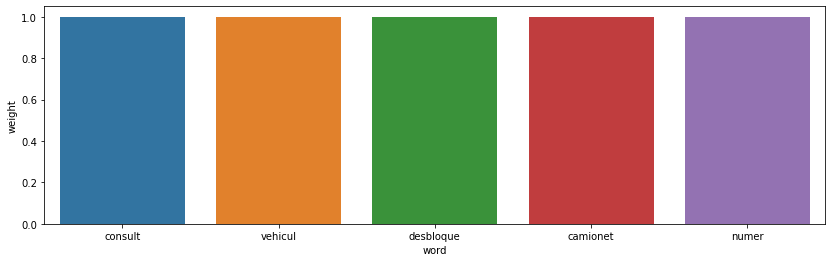

In [48]:
#Palabras con mayor peso
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x = "word", y = "weight", ax=ax, data=df_top_values_tfidf)

In [49]:

#MATRIZ DE COOCURRENCIA
def create_co_occurences_matrix(allowed_words, documents):
    #print(f"allowed_words:\n{allowed_words}")
    #print(f"documents:\n{documents}")
    word_to_id = dict(zip(allowed_words, range(len(allowed_words))))
    documents_as_ids = [np.sort([word_to_id[w] for w in doc if w in word_to_id]).astype('uint32') for doc in documents]
    row_ind, col_ind = zip(*itertools.chain(*[[(i, w) for w in doc] for i, doc in enumerate(documents_as_ids)]))
    data = np.ones(len(row_ind), dtype='uint32')  # use unsigned int for better memory utilization
    max_word_id = max(itertools.chain(*documents_as_ids)) + 1
    docs_words_matrix = csr_matrix((data, (row_ind, col_ind)), shape=(len(documents_as_ids), max_word_id))  # efficient arithmetic operations with CSR * CSR
    words_cooc_matrix = docs_words_matrix.T * docs_words_matrix  # multiplying docs_words_matrix with its transpose matrix would generate the co-occurences matrix
    words_cooc_matrix.setdiag(0)
    #print(f"words_cooc_matrix:\n{words_cooc_matrix.todense()}")
    return words_cooc_matrix, word_to_id 

In [50]:

(bag_of_wors_co,voc) = create_co_occurences_matrix(vectorizer_tfidf.get_feature_names(),df_sd['text'])

C:\Users\farayal\Anaconda3\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [51]:
bag_of_wors_co.shape

(16630, 16630)

In [52]:
#RELACION DE PALABRAS
name_doc = []
for i in range(len(df_sd['Descripción'])):
  name_doc.append('Doc '+str(i))

df_coun_vectorize_co = pd.DataFrame(bag_of_wors_co.toarray(),columns=vectorizer_tfidf.get_feature_names(),index=vectorizer_tfidf.get_feature_names())

df_coun_vectorize_co.head(5)

,aaaa,aacun,aacunabloque,aacunaemail,aadjunt,aal,aalegri,aalegriabloque,aalegriaemail,aalfaroemail,...,zuñug,zzunig,zzunigaemail,zzunigagbloque,zzunigu,zzuñigabloque,zzuñigaemail,àasoc,àre,ùltim
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacunabloque,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacunaemail,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aadjunt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#PALABRAS MAS RELACIIONADAS
#Variable para almacenar valores
correlacion = []
for n, col in enumerate(df_coun_vectorize_co.T):
  #Guarda palabra,numero de la palabra, la mejor relacion, numero de la mejor relacion, peso de relacion
  correlacion.append([col,n,df_coun_vectorize_co.T[col].nlargest(1).index.tolist()[0],voc.get(df_coun_vectorize_co.T[col].nlargest(1).index.tolist()[0]),df_coun_vectorize_co.T[col].nlargest(1).values[0]])
    
#Transforma la variable relacion a dataframe
df_coun_vectorize_co_relation = pd.DataFrame(correlacion,columns=['Word','Number_word','bests_relation','number_best_relation','weight'])

df_coun_vectorize_co_relation.head()

,Word,Number_word,bests_relation,number_best_relation,weight
0,aaaa,0,text,15273,17
1,aacun,1,corre,3721,4
2,aacunabloque,2,reset,13354,2
3,aacunaemail,3,acuñ,242,2
4,aadjunt,4,aaaa,0,0


In [54]:
#Variable para almacentar terminos relacionados
relation = []
#Unir los terminos relacionados
for i in range(len(df_coun_vectorize_co)):
  #print(df_top_values_co.iloc[i:, [2]].values)
  relation.append(str([df_coun_vectorize_co_relation.iloc[i, [0]].values[0],df_coun_vectorize_co_relation.iloc[i, [2]].values[0]]))
    
df_coun_vectorize_co_relation['relation']=relation

<AxesSubplot:xlabel='relation', ylabel='weight'>

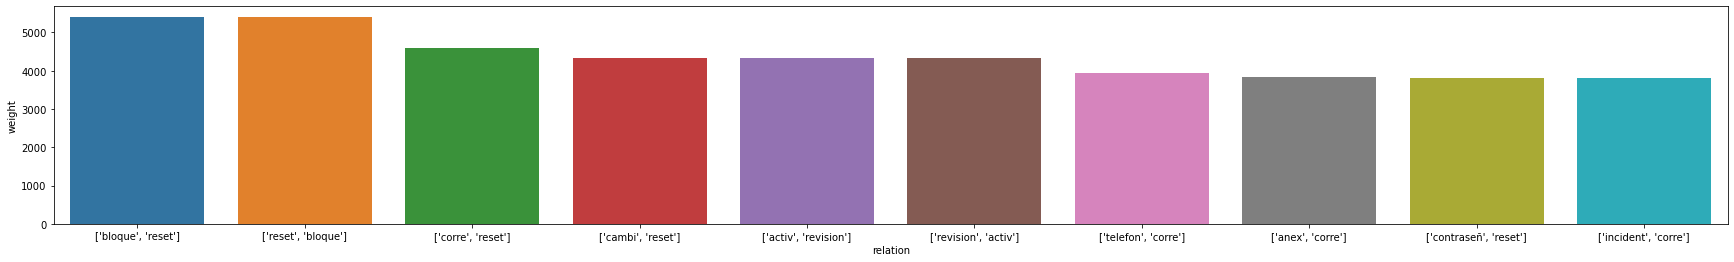

In [55]:
#Graficar palabras mas relacionadas

df_top_values_co = df_coun_vectorize_co_relation.sort_values(by='weight',ascending=False)[0:10]

fig_dims = (30, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x = "relation", y = "weight", ax=ax, data=df_top_values_co)

# LDA Latent Direct Allocation

In [56]:
#Modelado de Temas
#El modelado de temas resuelve el siguiente tipo de problema: tiene un conjunto de documentos de texto (como correos electrónicos, respuestas a encuestas, #tickets de soporte, revisiones de productos, etc.) y desea conocer los diferentes temas que cubren y agruparlos por temas

#La forma en que funcionan estos algoritmos es asumiendo que cada documento está compuesto por una mezcla de temas, y luego tratando de descubrir qué tan #fuerte es la presencia de cada tema en un documento dado. Esto se realiza agrupando los documentos en función de las palabras que contienen y observando #las correlaciones entre ellos.

In [40]:
#Asignación de Dirichlet Latente (LDA)
import time



kmin, kmax = 4,9

topic_models = []
# Probando modelo lda con distintos parametros
for k in range(kmin,kmax+1):
    print("Aplicando lda para k=%d ..." % k )
    # Ejecutando modelo LDA
    %time model = LatentDirichletAllocation( n_components=k,random_state=0,n_jobs=-1,evaluate_every=10 ) 
    # Almacenando resultado del modelo
    W = model.fit_transform( bag_of_wors_idf )
    # Almacenando componentes
    H = model.components_    
    # Almacenar resultados para su posterior uso
    topic_models.append( (k,W,H) )

Aplicando lda para k=4 ...
Wall time: 193 ms
Aplicando lda para k=5 ...
Wall time: 0 ns
Aplicando lda para k=6 ...
Wall time: 0 ns
Aplicando lda para k=7 ...
Wall time: 0 ns
Aplicando lda para k=8 ...
Wall time: 0 ns
Aplicando lda para k=9 ...
Wall time: 996 µs


In [41]:

#CALCULO DE COHERENCIA
def calculate_coherence_sp( term_rankings ):
  #Variable para calculo de puntajes
  overall_coherence = 0.0
  #Recorriendo el ranking de terminos
  for topic_index in range(len(term_rankings)):
    #Variable para almacenar los puntajes de similaridad
    pair_scores = []
    #Realizar las combinaciones posibles entre el top de los terminos mas relevantes
    for pair in combinations( term_rankings[topic_index], 2 ):
      #print('Combinando: ',pair[0],pair[1])
      #aplicando modelo spacy a las palabras
      tokens = nlp(pair[0])
      similar_word = nlp(pair[1])
      #En el caso de que existan las palabras buscar relacion
      if similar_word.vector_norm and tokens.vector_norm:
        #print('similaridad: ',similar_word.similarity(tokens))
        #Calculando similaridad
        pair_scores.append( similar_word.similarity(tokens))
      #En el caso de no existir la palabra en el vocabulario de spacy - relacion 0
      else:
        #print('similaridad: ',0)
        pair_scores.append(0)
    # Obtener promedio de puntajes
    topic_score = sum(pair_scores) / len(pair_scores)
    #Calculando coherencia
    overall_coherence += topic_score
  overall_coherence=overall_coherence/len(term_rankings)
    # get the mean score across all topics
  return overall_coherence

In [42]:
#BUSCAR EN DICCONARIO
def busca_dic(dic,value):
  #Recorrer diccionario
  for x in dic:
    #Comprobando valor en diccionario
    if dic.get(x) == value:
      #Retornando nombre
      return x
#vectorizer_tfidf.vocabulary_.values()

In [43]:
#CONOCER LAS 10 PALABRAS MAS COHERENTES POR TOPICO

def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
      #print(all_terms)
      #top_terms.append(busca_dic(all_terms,term_index))
      top_terms.append(all_terms[term_index])
    return top_terms

In [44]:
from itertools import combinations
#SPACY_WARNING_IGNORE="W008"
import ast 
k_values = []
coherences_sp = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( vectorizer_tfidf.get_feature_names() , H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    #print(w2v_model,term_rankings)
    coherences_sp.append( calculate_coherence_sp( term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences_sp[-1] ) )

K=04: Coherence=0.1065
K=05: Coherence=0.1298
K=06: Coherence=0.1152
K=07: Coherence=0.1375
K=08: Coherence=0.0697
K=09: Coherence=0.0963


In [45]:
%matplotlib inline

plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

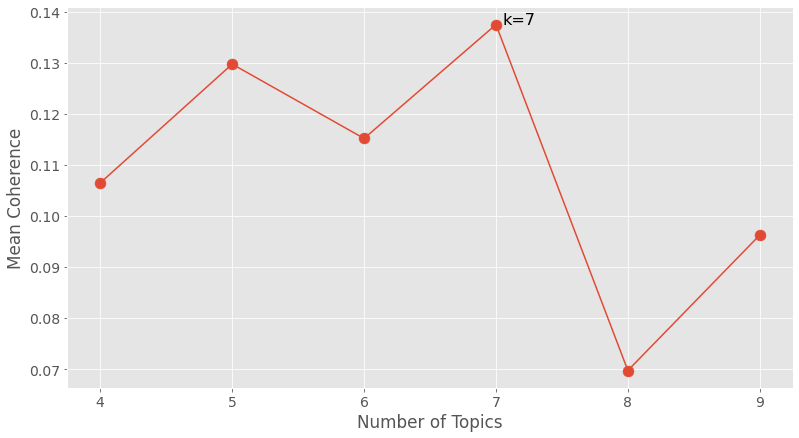

In [46]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences_sp )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences_sp, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences_sp)
xpos = coherences_sp.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [79]:
#EXAMINANDO EL MODELO FINAL
#k=7
k = best_k
# obtener el modelo que generamos anteriormente.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]
k

7

In [80]:
#Palabras mas relevantes por temas
for topic_index in range(k):
  descriptor = get_descriptor( vectorizer_tfidf.get_feature_names(), H, topic_index, 15 )
  str_descriptor = ", ".join( descriptor )
  print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

# text

Topic 01: reset, corre, anex, bloque, telefon, incident, indic, contraseñ, cambi, descripcion, desbloque, email, red, vpn, clav
Topic 02: oficin, vehicul, gestion, envi, equip, plant, visit, recint, retir, servici, requer, tard, direccion, adjunt, despach
Topic 03: reset, descripcion, bloque, desbloque, email, cambi, indic, red, clav, corre, sap, incident, telefon, vpn, anex
Topic 04: acces, client, transaccion, adjunt, esval, requer, cre, inform, sistem, ingres, tard, sap, necesit, creacion, gestion
Topic 05: problem, error, present, ingres, aplic, indic, llam, instal, aparec, equip, abrir, firm, sign, singl, qued
Topic 06: reset, cambi, corre, contraseñ, indic, bloque, desbloque, descripcion, red, telefon, resetdescripcion, incident, anex, email, vpn
Topic 07: consult, inc, ticket, req, descripcion, insistent, indic, corre, telefon, ubic, vpn, incident, anex, oficin, email


# KMEANS

In [33]:
from sklearn.cluster import KMeans

#Inicializar k means con 7 centroides
kmeans = KMeans(n_clusters=8,random_state=42,max_iter=10000)

#fit model
kmeans.fit(bag_of_wors_idf)

#Cluste
clusters = kmeans.labels_

# Reduccion de dimencionalidad

In [34]:
from sklearn.decomposition import PCA

#Inicializando PCA
pca = PCA(n_components=2,random_state=42)

pca_vecs = pca.fit_transform(bag_of_wors_idf.toarray())

x0 = pca_vecs[:,0]
x1 = pca_vecs[:,1]

In [35]:
df_sd['Cluster'] = clusters
df_sd['x0'] = x0
df_sd['x1'] = x1

In [36]:
df_sd

,Descripción,Description,largo,length,Tipo,text,Cluster,x0,x1
0,se solicita finalizar reposición de fecha 20-0...,se solicita finalizar reposición de fecha 20-0...,52,52,TI - Requerimiento,"[solicit, finaliz, reposicion, fech]",0,-0.091475,0.010822
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,165,165,TI - Desbloqueo y/o Reinicio de Claves,"[nombr, daniel, rodriguezemail, reset, desbloq...",7,-0.029638,0.021678
2,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,145,145,TI - Desbloqueo y/o Reinicio de Claves,"[jeny, vallej, rey, jvallej, movil, ubicacion,...",7,0.044827,0.043455
3,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,161,161,TI - Desbloqueo y/o Reinicio de Claves,"[nombr, gisell, carrascoemail, reset, resetdes...",5,0.044460,0.066039
4,Nombre: Carlos GallardoUsuario: cgallardoEmail...,Nombre: Carlos GallardoUsuario: cgallardoEmail...,109,109,TI - Requerimiento,"[nombr, carl, gallardousuari, cgallardoemail, ...",7,-0.052432,0.075376
...,...,...,...,...,...,...,...,...,...
26477,"ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...","ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...",67,67,TI - Creación y/o modificación de cuentas,"[estim, favor, requier, usuari, sigec, cmorg, ...",0,-0.084135,0.013062
26478,estimado envío solicitud para revisión de celu...,estimado envío solicitud para revisión de celu...,135,135,TI - Incidencia,"[estim, envi, solicitud, revision, celul, sams...",0,-0.108433,0.024814
26479,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,232,232,TI - Desbloqueo y/o Reinicio de Claves,"[incident, usuari, indic, trat, acced, escrito...",3,0.085279,-0.193776
26480,Descripción: Se solicita una Planta elevadora...,Descripción: Se solicita una Planta elevadora...,257,257,ADM - Reparaciones,"[descripcion, solicit, plant, elevador, tip, n...",0,-0.076613,0.035625


In [37]:

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(bag_of_wors_idf.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer_tfidf.get_feature_names() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
esval,oficin,client,requer,vehicul,tard,envi,gestion,equip,adjunt

Cluster 1
telefon,anex,incident,red,clav,corre,contraseñ,cambi,bloque,reset

Cluster 2
corre,red,telefon,incident,anex,descripcion,vpn,bloque,reset,desbloque

Cluster 3
error,aplic,logr,indic,cas,ubic,corre,telefon,anex,incident

Cluster 4
vpn,telefon,email,indic,insistent,descripcion,ticket,req,inc,consult

Cluster 5
cibersegur,red,corre,clav,lleg,indic,reset,contraseñ,cambi,resetdescripcion

Cluster 6
extend,cuent,servici,vpn,transitori,siguient,sap,requer,transaccion,acces

Cluster 7
aparec,ingres,acced,vpn,email,celul,present,descripcion,error,indic


In [38]:
# map clusters to appropriate labels 
cluster_map = {0: "Vehiculo", 1: "Cambio de Clabe", 2: "indicacion", 3: "Reinicio de clave", 4: "Desbloqueo", 5: "Error de acceso", 6: "Vehiculo", 7: "las"}
# apply mapping
df_sd['Cluste'] = df_sd['Cluster'].map(cluster_map)

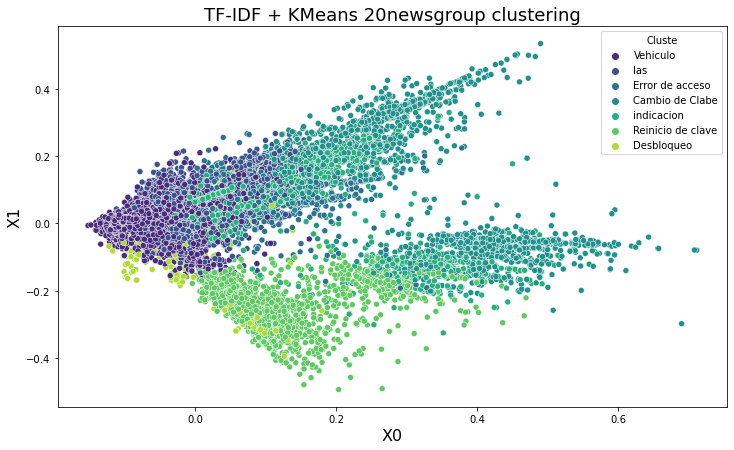

In [39]:

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_sd, x='x0', y='x1', hue='Cluste', palette="viridis")
plt.show()

# Grafica

In [ ]:
sns.countplot(df_sd.Cluste)

In [ ]:
sns.countplot(df_sd.Tipo)

In [ ]:
#text = "Buenos dias, me gustaria solicitar un vehiculo para realizar la instalacion de un equipo"
#TRANSPORTE
#text="Estimados, Solicito a ustedes una camioneta entre las fechas indicadas en el formulario, con el motivo de asistir a una visita en terreno para el programa GROT en las plantas de Canela Alta, Canela Baja y los Vilos. Si hubiera la posibilidad de que esta fuera retirada en Viña del Mar les estaría mas que agradecido. Gracias por adelantado. Saludos, Andres Cordova M"
#text="Se solicita vehículo para visita a plantas Hijuelas"# - Centenario - Oriente - Pachacama (La Cruz - Hijuelas)# con motivo de revisión de sistemas de dosificación de flúor y levantamiento GROT en San Jerónimo (San Antonio) Muchas gracias. Saludos.
#text="Estimados solicito trasladar camioneta KXXJ-26 desde recinto Uno Norte hacia recinto Bustamante #20, vehículo será trasladado por personal equipo de mantenimiento el Sr. Johan Blancheteau ."

#DESBLOQUEO DE CUENTAS 
text="Desbloqueo/reset No puede conectarse a la vpnSolicitud/ incidente: No puede conectarse a vpn Nombres: Luis Alejandro Galleguillos GalleguillosAnexo / Telefono: 942427492Correo: lgalleguillos@aguasdelvalle.clUsuario: lgalleguillosBloqueo / reset: "
#text = "Nombre: Javier LeguaEmail: jlegua@esval.clUsuario: jleguaBloqueo/Reset: ResetDescripcion: usuario indica que le llego correo para cambio de contraseña "
#text = "Desbloqueo/reset Tiene el usuario bloqueadoSolicitud/ incidente:  desbloqueo de usuario Nombres: Roberto Enrique Stevenson AriasRut: 10889980-8Anexo / Telefono: 9929Correo: rstevenson@esval.clUsuario: Rstevenson Bloqueo / reset: Reset "
#text = "POR FAVOR NECESITO CLAVE DE ACCESO AL SIGEC, SE BLOQUEO"


#CREACION DE CUENTAS
#text = "Estimados, Solicitamos por favor de su apoyo en la extensión de la cuenta del practicante Nicole Saez C. - Práctica <nsaez.practica@esval.cl> hasta el 22 de julio de 2022Lo anterior es porque Nicoles realizará su memoria. Gracias!"



#text="Se requiere reponer o reparar tapas de wc de baños de "#hombres de 1"# norte"# Viña del Mar"
#text = "Estimado favor se requiere reparación de llaves de jardín en oficina PTAS La Chimba, y por filtración. atte Constanza Oyanedel"

#text="Se solicita con urgencia sanitización de dos recintos (Baños) por rebase de AS"# asociado trabajo de mantenimiento con camión HIDROJET. SISDA: 2370793 Dirección: El Progreso # 791, Pob. Santa Rosa, La Calera Nombre Cliente: Patricio Ortiz Recintos: Dos recintos (Baños) de 4 m2 app cada uno. Contacto: Sr. Patricio Ortiz Cel, 966907131 Sra. Pamela Berrios (esposa)cel 91052280"
#text="puerta de baño mujeres no cierra, topa al marco no permite cerrar "

#Requerimiento
#text="Estimados.    Junto con saludar, solicito por favor la instalación de 4 dispensadores de alcohol gel para la Recinto PTAS Placilla. a cargo de Daniel Antilaf, ubicaciones, Laboratorio, Oficina Daniel Antilaf, Comedor, Sala reunión. enviare los registros fotográficos al grupo de Wsp. agradeciendo desde ya.  Me despido cordialmente.  Sebastián Troncoso Sinn"
#text = "Nombre: Carlos GallardoUsuario: cgallardoEmail: cgallardo@aguasdelvalle.clConsulta /Insistencia:Descripcion:"
#text="favor realizar gestión de retiro de equipamiento para : Usuario 	:claudio brionesdirección 	: pasaje Dagoberto Godoy El Bosque, Villa Alemanacontacto 	: +56 9 8995 6861 se adjunta guía  de despacho : retiro"

#TI - Creación y/o modificación de cuentas
#text="Buenos dias: Junto con saludar y desear que se encuentren bien. Solicito acceso a transacción me51n, esto con el fin de poder crear solicitudes de pedido con el fin de gestionar estados de pago a contratistas. Atenta a sus comentarios. Saludos Cordiales atte. María Victoria Nieto Urtubia"
#text = "Estimados necesito que le den acceso l personal del laboratorio de la SPAP Concón, ya que ellos son los encargado de la atención a clientes. Saludos Alicia"
#text="Estimados necesito que le den acceso l personal del laboratorio de la SPAP Concón, ya que ellos son los encargado de la atención a clientes. Saludos Alicia"


#DUDA
#text = "Muy buenos días. Se solicita factibilidad de entregar modem de internet, para ser utilizado en los recintos estratégicos de la empresa, con el fin de poder captar las imágenes de cámaras de video vigilancia que actualmente se mantiene, situación que complementa la seguridad de dichos lugares, permitiendo el monitoreo a distancia de dichos equipos y recintos. Los recintos estratégicos a que se hace referencia y que son fiscalizados por Carabineros de Chile serían: Recinto Las Delicias de Vicuña y Las Rojas en La Serena. Igualmente, conforme a las dimensiones de recintos y su importancia respecto de ubicación, producción y tratamiento, entre otros, se requiere mismo equipo (Modem para internet) para ser utilizado con el mismo fin, en cámaras de video vigilancia, en los siguientes recintos: Emisario de La Serena. Emisario de Guayacán en Coquimbo. Recinto Conchalí de Los Vilos. Recinto La Cantera sector Peñuelas Coquimbo. Totalidad de equipos requeridos: 7 Modem Internet. Los recintos señalados, no mantienen sistema que permita ser conectados a la red de la empresa, imposibilitando de esa forma el monitoreo a distancia de las imágenes de cámaras de vigilancia. Lo anterior es de gran importancia, debido a las fiscalizaciones que realiza la señalada autoridad de Carabineros y a la vez, mejora el sistema de seguridad en general. Los equipos deben ser enviados a esta Unidad de Seguridad con el objeto de realizar posterior instalación y funcionamiento, previa coordinación con personal del área respectiva. Atento a sus comentarios. Saludos cordiales. Ante consultas se puede realizar a mi persona o con Juan C. Pereira que trabaja en la Unidad de Seguridad Aguas del Valle (+569 79892389) Atte GERARDO A. ARAVENA PINILLA JEFE UNIDAD DE SEGURIDAD +56990306119"


#Incidente
#text="Junto con saludar, se solicita revisión de caso, cliente suscrito a boleta electrónica en la OV, no se ha reflejado en sistema"

#Correjido
#Incidente
#text = "Desbloqueo/reset No Solicitud/ incidente: No puede acceder a Outlook no ver archivos de excelNombres:Maria Teresa Ávalos AguileraAnexo / Teléfono: 0112449952429544Correo: mavalos@esval.cl	Usuario: mavalosBloqueo / reset: Reset Se reinicia equipo"
#text="Desbloqueo/reset No puede acceder a SAP Solicitud/ incidente: No tiene acceso a sap Nombres: Nazia Doménica Delaire CabadaAnexo / Telefono: 962697718Correo: ndelaire.st@aguasdelvalle.clUsuario: ndelaire"
#text="Nombre: Hipolito BarrazaCelular: 942891383 Correo: hbarrazab@esval.clUbicación: CasaUsuario: hbarrazabRut: 18580806-8Adjuntar Print Pantalla: N/aAny: 180215078Descripción: Usuario se comunica ya que no sabe como realizar proceso de carga en el sistema Sap"



In [ ]:
t = normalize(text)
mt = vectorizer_tfidf.transform(t)
kmeans.predict(mt)

# Otros metodos de estimacion de numero de K


In [49]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

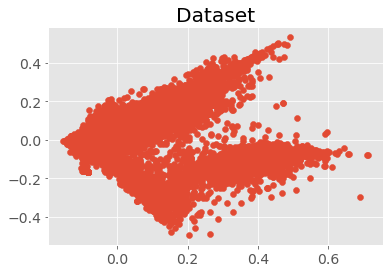

In [50]:
#Graficar dataset
plt.plot() 
#plt.xlim([0, 10]) 
#plt.ylim([0, 10]) 
plt.title('Dataset') 
plt.scatter(x0, x1) 
plt.show() 

In [51]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score,silhouette_samples
X=np.array(list(zip(x0,x1))).reshape(len(x0),2)

In [52]:
#Identificando Centroides
max_k = 10
K=range(1,max_k)
ssw=[]
color_palette=[plt.cm.nipy_spectral(float(i)/max_k) for i in K]
centroid =[sum(X)/len(X) for i in K]
sst = sum (np.min(cdist(X,centroid,"euclidean"),axis=1))

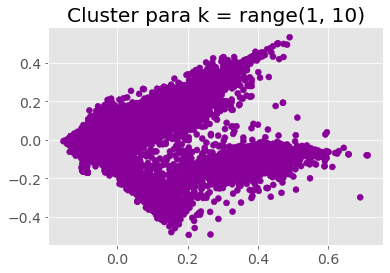

* para k =  2  El promedio de la silueta es de:  0.6618870673029819
   - Para i =  1  la silueta del cluster vale:  0.7358719065641606
   - Para i =  2  la silueta del cluster vale:  0.2999950404207714


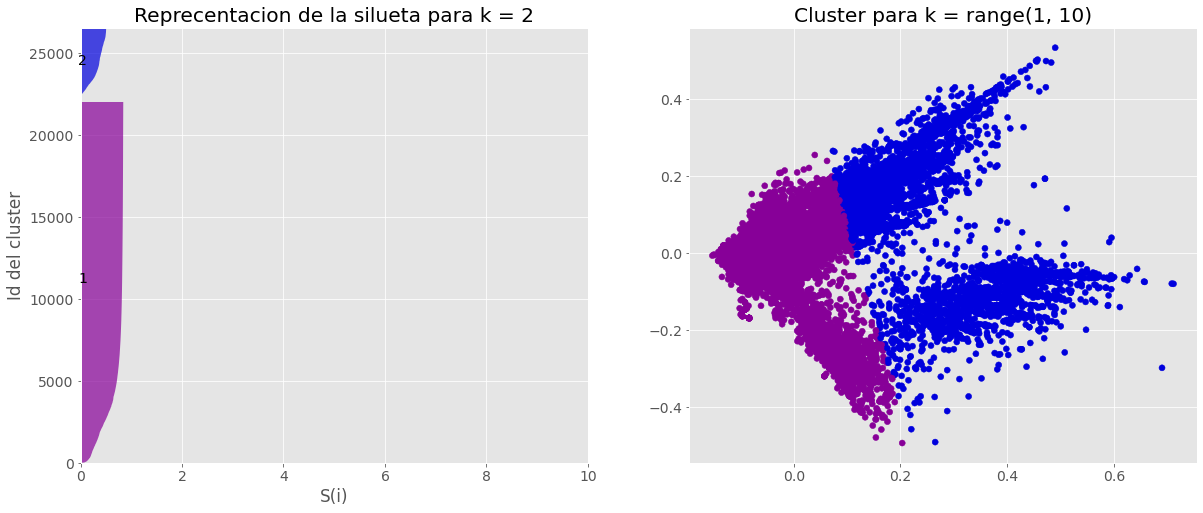

* para k =  3  El promedio de la silueta es de:  0.6851214055581931
   - Para i =  1  la silueta del cluster vale:  0.4540814090461447
   - Para i =  2  la silueta del cluster vale:  0.7782005875081419
   - Para i =  3  la silueta del cluster vale:  0.35216285113813617


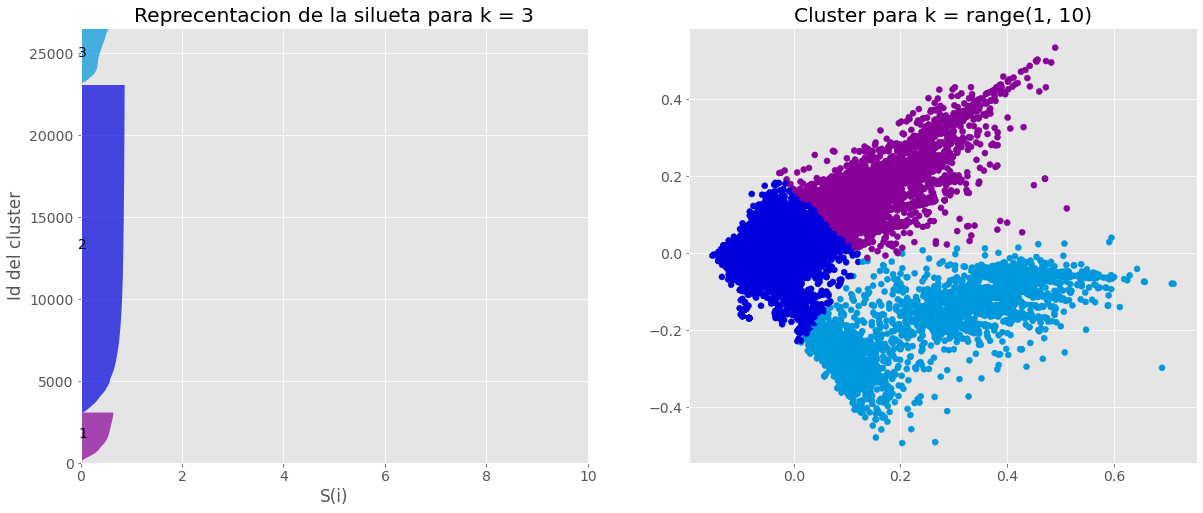

* para k =  4  El promedio de la silueta es de:  0.7124752014328237
   - Para i =  1  la silueta del cluster vale:  0.7725648845474841
   - Para i =  2  la silueta del cluster vale:  0.6111363626074402
   - Para i =  3  la silueta del cluster vale:  0.43910295277701095
   - Para i =  4  la silueta del cluster vale:  0.6226410107624024


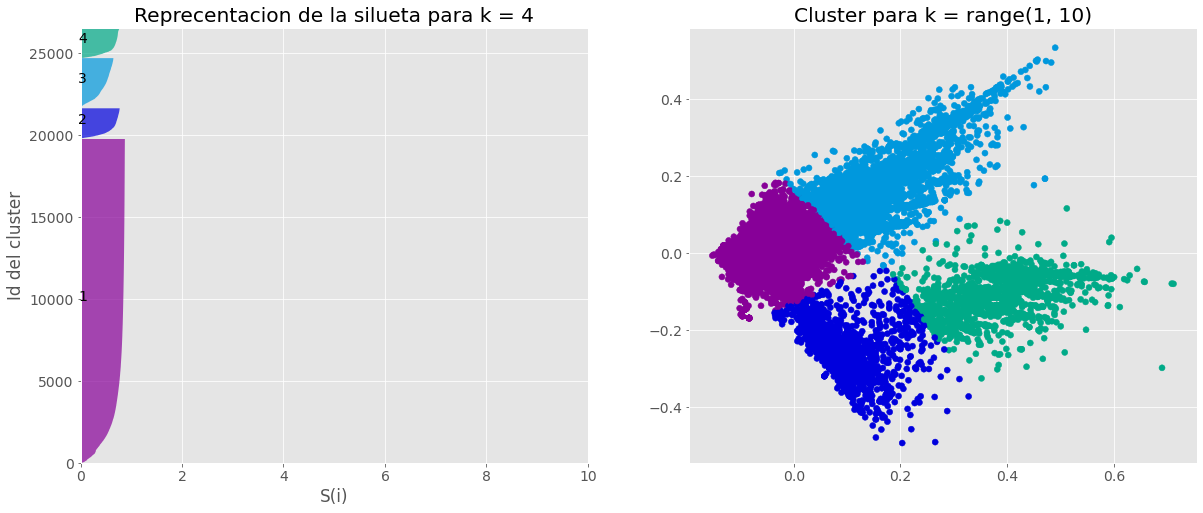

* para k =  5  El promedio de la silueta es de:  0.6528931370041949
   - Para i =  1  la silueta del cluster vale:  0.720113004254399
   - Para i =  2  la silueta del cluster vale:  0.4723996613408748
   - Para i =  3  la silueta del cluster vale:  0.613120402041772
   - Para i =  4  la silueta del cluster vale:  0.6237619223353058
   - Para i =  5  la silueta del cluster vale:  0.37450730186461706


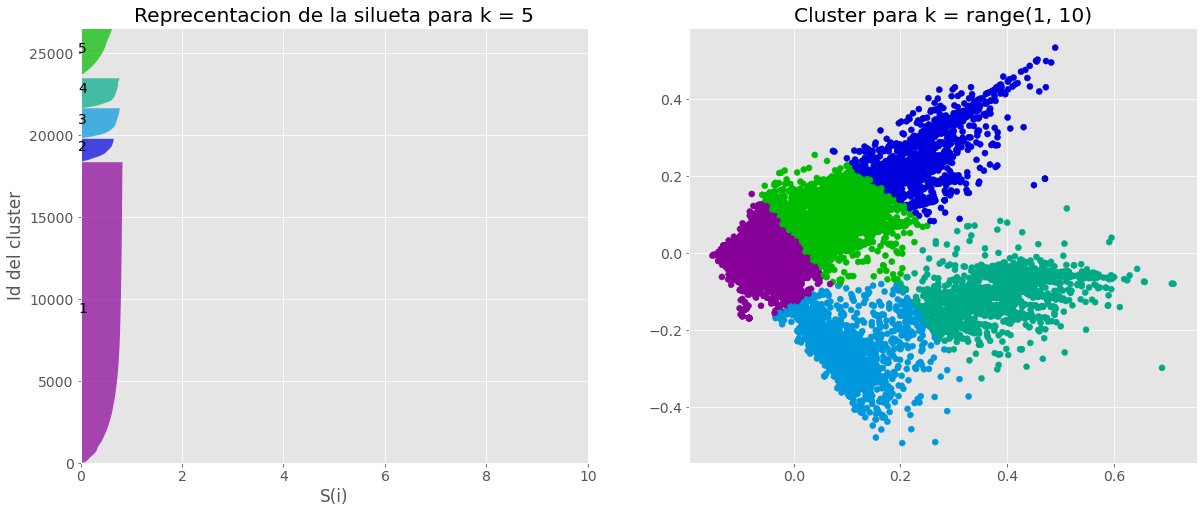

* para k =  6  El promedio de la silueta es de:  0.5579072221692183
   - Para i =  1  la silueta del cluster vale:  0.27232358566125014
   - Para i =  2  la silueta del cluster vale:  0.6174759284192122
   - Para i =  3  la silueta del cluster vale:  0.498226201419535
   - Para i =  4  la silueta del cluster vale:  0.6112263830486452
   - Para i =  5  la silueta del cluster vale:  0.36799121469411156
   - Para i =  6  la silueta del cluster vale:  0.6306119737435415


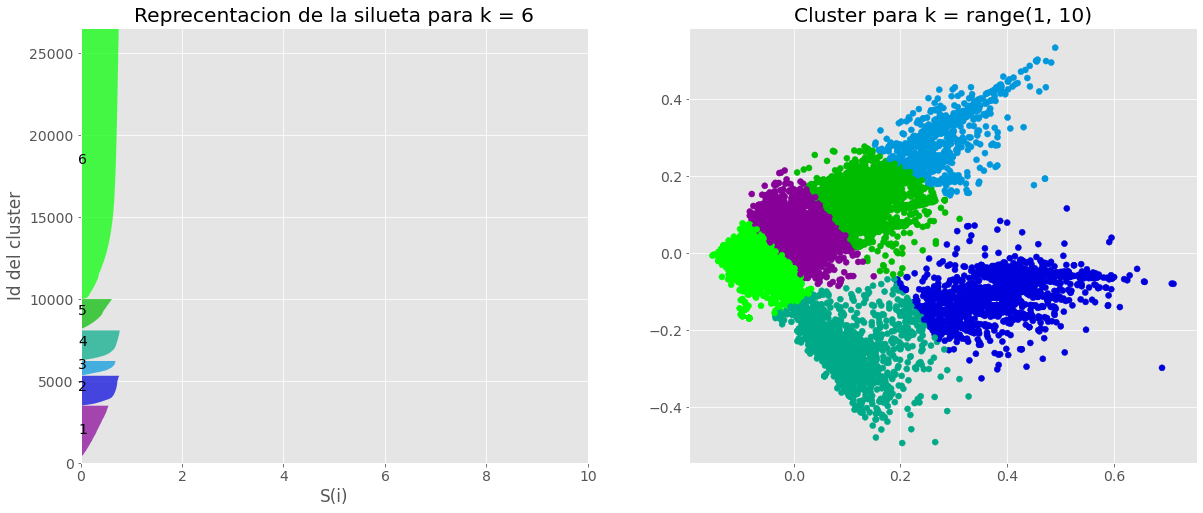

* para k =  7  El promedio de la silueta es de:  0.5343889165578494
   - Para i =  1  la silueta del cluster vale:  0.6423745222821182
   - Para i =  2  la silueta del cluster vale:  0.6121465069295903
   - Para i =  3  la silueta del cluster vale:  0.3648871752274714
   - Para i =  4  la silueta del cluster vale:  0.5743785538905747
   - Para i =  5  la silueta del cluster vale:  0.28961203277159353
   - Para i =  6  la silueta del cluster vale:  0.5157726188581312
   - Para i =  7  la silueta del cluster vale:  0.23677544037826087


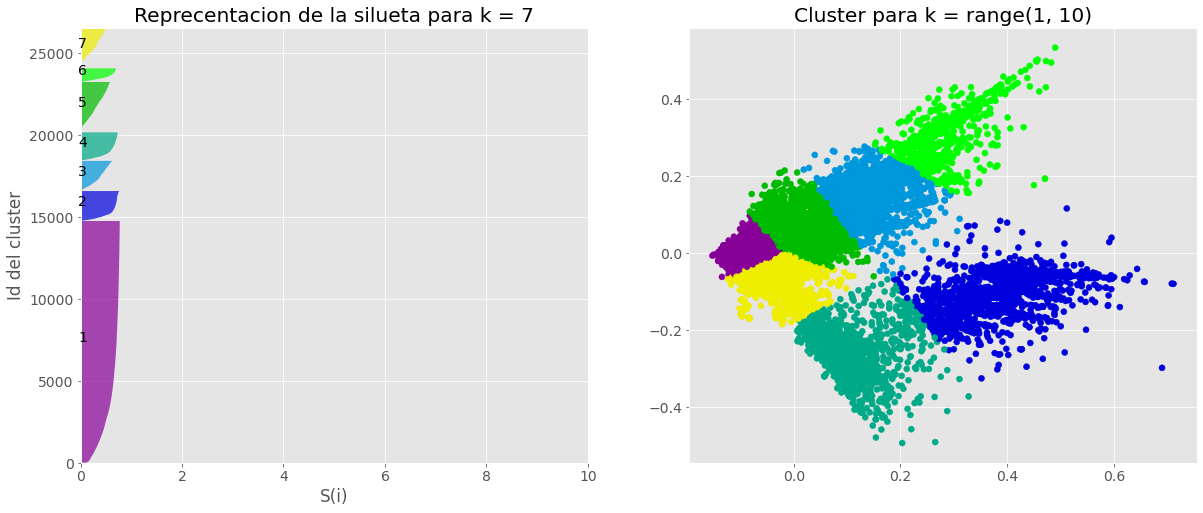

* para k =  8  El promedio de la silueta es de:  0.5234712373052596
   - Para i =  1  la silueta del cluster vale:  0.23293175178651976
   - Para i =  2  la silueta del cluster vale:  0.5237112081955636
   - Para i =  3  la silueta del cluster vale:  0.5068547199982758
   - Para i =  4  la silueta del cluster vale:  0.5853645796055016
   - Para i =  5  la silueta del cluster vale:  0.36900527383830517
   - Para i =  6  la silueta del cluster vale:  0.643348148382073
   - Para i =  7  la silueta del cluster vale:  0.285228605373041
   - Para i =  8  la silueta del cluster vale:  0.4049430950379367


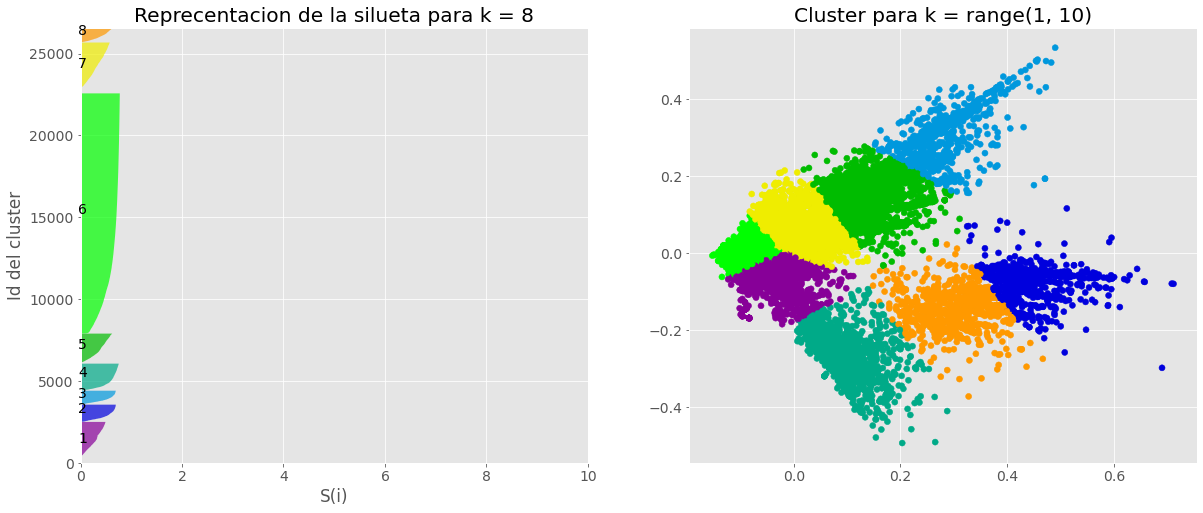

* para k =  9  El promedio de la silueta es de:  0.5075526347158408
   - Para i =  1  la silueta del cluster vale:  0.28001306145720245
   - Para i =  2  la silueta del cluster vale:  0.5247885819125071
   - Para i =  3  la silueta del cluster vale:  0.5850810196171334
   - Para i =  4  la silueta del cluster vale:  0.3041331785079754
   - Para i =  5  la silueta del cluster vale:  0.6435005303469485
   - Para i =  6  la silueta del cluster vale:  0.5540330876498033
   - Para i =  7  la silueta del cluster vale:  0.4052740668068105
   - Para i =  8  la silueta del cluster vale:  0.3797759589542005
   - Para i =  9  la silueta del cluster vale:  0.2246312107459845


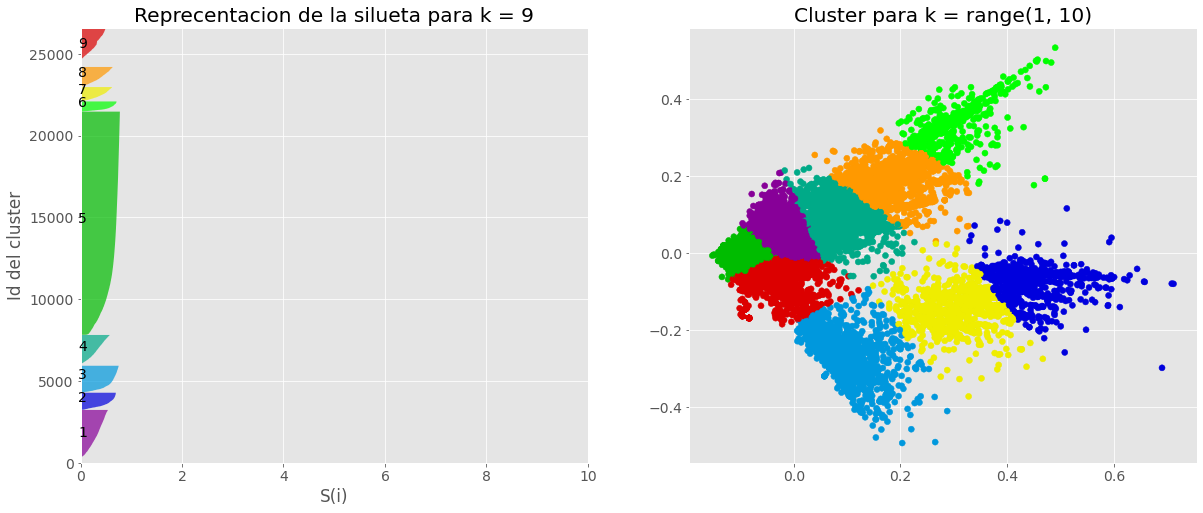

In [53]:
#Identificando el mejor modelo
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_,"euclidean"),axis=1))
    ssw.append(ssw_k)
    lebel_colors = [color_palette[i] for i in labels]
    #Fabicando una silueta para cada cluster
    if 1<k<len(X):
        #Creamos un subplot de una fila y dos columnas
        fig,(axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        #Los valores se encuentran entre 0 y 1
        axis1.set_xlim([0,10])
        
        axis1.set_ylim([0,len(X)+(k+1)*10])
        
        silhouette_avg = silhouette_score(X,labels)
        
        print("* para k = ",k, " El promedio de la silueta es de: ",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X,labels)
        
        y_lower = 10
        
        for i in range (k):
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print("   - Para i = ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            #Ordennando desendentemente la silueta
            ith_cluster_sv.sort()
            #Calculamos donde colocar la primer silueta del eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower+ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper),
                                0,ith_cluster_sv,facecolor=color,alpha=0.7)
            
            axis1.text(-0.05,y_lower + 0.5 * ith_cluster_size,str(i+1))
            
            y_lower = y_upper+10
            
        axis1.set_title("Reprecentacion de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Id del cluster")
         
    plt.plot()
    #plt.xlim([0,10])
    #plt.ylim([0,10])
    plt.title("Cluster para k = %s"%str(K))
    plt.scatter(x0,x1, c=lebel_colors)
    plt.show()
    

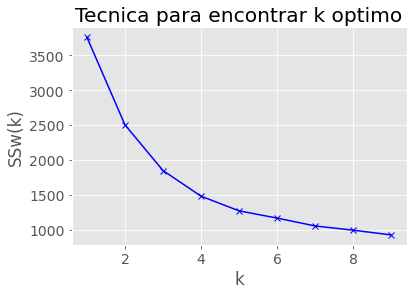

In [54]:
#Graficando tecnica del codo para K optimo
plt.plot(K,ssw,"bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("Tecnica para encontrar k optimo")
plt.show()

# Propagacion de afinidad

In [85]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

# Distribucion de anillos

In [88]:
#from math import sin,cos,radians,pi,sqrt
#import numpy.random as rnd

In [90]:
#def ring(r_min = 0, r_max = 1, n_samples = 360):
#    angle = rnd.uniform(0,2*pi,n_samples)
#    distance = rnd.uniform(r_min,r_max,n_samples)
#    data = []
#    for a,d in zip(angle,distance):
#        data.append([d*cos(a),d*sen(a)])
#    return np.array(data)

In [ ]:
#labels = np.concatenate([[0 for i in range(0,len(data1))]])

# Algoritmo de los k Medoides

# Best LDA

In [89]:
#Eligiendo el mejor modelo
k= best_k#topic_models[k-kmin][0]
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [90]:
k

7

In [91]:
#vectorizer_tfidf.get_feature_names()

In [92]:
#Guardardo del mejor modelo
pickle.dump(topic_models[k-kmin], open("topic_7_models.pk", 'wb'))

In [93]:
#Palabras mas relevantes por texto
for topic_index in range(k):
  descriptor = get_descriptor( vectorizer_tfidf.get_feature_names(), H, topic_index, 10 )
  str_descriptor = ", ".join( descriptor )
  print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: reset, corre, anex, bloque, telefon, incident, indic, contraseñ, cambi, descripcion
Topic 02: oficin, vehicul, gestion, envi, equip, plant, visit, recint, retir, servici
Topic 03: reset, descripcion, bloque, desbloque, email, cambi, indic, red, clav, corre
Topic 04: acces, client, transaccion, adjunt, esval, requer, cre, inform, sistem, ingres
Topic 05: problem, error, present, ingres, aplic, indic, llam, instal, aparec, equip
Topic 06: reset, cambi, corre, contraseñ, indic, bloque, desbloque, descripcion, red, telefon
Topic 07: consult, inc, ticket, req, descripcion, insistent, indic, corre, telefon, ubic


In [ ]:
#Graid search, intenta encontrar el modelo que arroja mejores resultados

In [107]:
#DEFINIENDO LOS PARAMETROS DE BUSQUEDA
search_params = {'n_components':[7,8],'learning_decay':[.5,.7,.9],'n_jobs':[-1]}


#INICIANDO EL MODELO

ldaa= LatentDirichletAllocation()



#INICIANDO LA CLASE GRID SEARCH
model = GridSearchCV(ldaa,param_grid=search_params)


GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       #it_params=None, iid=True, n_jobs=-1,
       param_grid={'n_components': [7,8], 'learning_decay': [0.5, 0.7, 0.9],'n_jobs':[-1]},
       pre_dispatch= -1, refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_method=None,
                                                 n_jobs=1),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [7, 8], 'n_jobs': [-1]},
             pre_dispatch=-1, return_train_score='warn')

In [108]:
#Ajustando modelo con bolsa de palabra
model.fit(bag_of_wors_idf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [7, 8], 'n_jobs': [-1]})

In [109]:
#Mejor modelo
best_lda_model=model.best_estimator_

In [110]:
best_lda_model

LatentDirichletAllocation(learning_decay=0.5, n_components=7, n_jobs=-1)

In [111]:
model = best_lda_model


In [112]:
#Entrenando modelo
#model(n_components=5)
LDA = model.fit_transform(bag_of_wors_idf)
#Tema dominante en el texto
k = model.n_components
# obtener el modelo que generamos anteriormente.
#W = topic_models[5][1]
#H = topic_models[5][2] 
W = model.transform(bag_of_wors_idf)
H = model.components_

In [106]:
model

LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [63]:
#best_ld

In [64]:
#best_lda_model.score(bag_of_wors_idf)

In [113]:
#Guardando el mejor modelo

pickle.dump(model, open("LDA_MODEL_7_TOPICS.pk", 'wb'))
#pickle.dump(best_lda_model, "/FileStore/models/best_lda_model.pk")


In [66]:

#Guardadno la bolsa de palabras
pickle.dump(bag_of_wors_idf, open("bag_of_words_7_topics.pk", 'wb'))

In [67]:
#Guardando el modelo de vectorizacion
pickle.dump(count_train_tfidf, open("tfidf_7_vector_topics.pk", 'wb'))

In [68]:
#pickle.dump(count_train_tfidf, open("tfidf_7_V2_vector.pk", 'wb'))

In [69]:
#Guardando el vocabulario
pickle.dump(vectorizer_tfidf.get_feature_names(), open("vocabulary_7_V2.pk", 'wb'))

In [70]:
#LOAD MODEL

#loaded_model = pickle.load(open("LDA_MODEL_7_TOPICS.pk", 'rb'))
#loaded_model = pickle.load(open("LDA_MODEL_7_V2_TOPICS.pk", 'rb'))
#loaded_model.best_estimator_
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [71]:
#model = loaded_model
#best_lda_model=model.best_estimator_

In [72]:
#len(topic_models[4])

In [73]:
#Paramtros modelo
#print("Best Model's Params: ",model.best_params_)

In [74]:
#REgistro ed puntaje de probabilidad
#print("Mejor puntaje de probabilidad: ",model.best_score_)

In [75]:
#for gscore in model.cv_results_:
#    print(gscore)
#lista=[]
#gscore = model.cv_results_['mean_test_score']
#params = model.cv_results_['param_learning_decay']
#for gscore,params in zip(gscore,params): 
#    if params==0.5:
#        lista.append(gscore)
        
#print(lista)

In [545]:

# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
#n_topics=[7,8,9]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
#gscore = model.cv_results_['std_test_score']#'mean_test_score']#'std_test_score']#mean_test_score']
#params = model.cv_results_['param_learning_decay']
#Log_likelyoods_5=[]
#Log_likelyoods_7=[]
#Log_likelyoods_9=[]
#for gscore,params in zip(gscore,params):
#    if params==0.5:
#        Log_likelyoods_5.append(round(gscore))
#    if params==0.7:
#        Log_likelyoods_7.append(round(gscore))
#    if params==0.9:
#        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
#plt.figure(figsize=(12, 8))
#plt.plot(n_topics, Log_likelyoods_5, label='0.5')
#plt.plot(n_topics, Log_likelyoods_7, label='0.7')
#plt.plot(n_topics, Log_likelyoods_9, label='0.9')
#plt.title("Choosing Optimal LDA Model")
#plt.xlabel("Num Topics")
#plt.ylabel("Log Likelyhood Scores")
#plt.legend(title='Learning decay', loc='best')
#plt.show()


In [546]:

# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
#n_topics=[7,8,9]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
#gscore = model.cv_results_['mean_test_score']#'mean_test_score']#'std_test_score']#mean_test_score']
#params = model.cv_results_['param_learning_decay']
#Log_likelyoods_5=[]
#Log_likelyoods_7=[]
#Log_likelyoods_9=[]
#for gscore,params in zip(gscore,params):
#    if params==0.5:
#        Log_likelyoods_5.append(round(gscore))
#    if params==0.7:
#        Log_likelyoods_7.append(round(gscore))
#    if params==0.9:
#        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
#plt.figure(figsize=(12, 8))
#plt.plot(n_topics, Log_likelyoods_5, label='0.5')
#plt.plot(n_topics, Log_likelyoods_7, label='0.7')
#plt.plot(n_topics, Log_likelyoods_9, label='0.9')
#plt.title("Choosing Optimal LDA Model")
#plt.xlabel("Num Topics")
#plt.ylabel("Log Likelyhood Scores")
#plt.legend(title='Learning decay', loc='best')
#plt.show()

In [547]:
#df_cv_results = pd.DataFrame(model.cv_results_)

In [548]:
#df_cv_results

In [549]:
#df_cv_results.to_csv("LDAGridSearchResults.csv", header=True, index=False, encoding='utf-8')

In [550]:
#best_lda_model.set_params()

In [551]:
#best_lda_model.components_.shape

In [552]:
#sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=df_cv_results)

In [433]:
#lda_output = best_lda_model.transform(bag_of_wors_idf)

In [434]:
#H=best_lda_model.components_.shape

In [435]:
#H

In [436]:
#lda_output2 = best_lda_model.fit_transform(bag_of_wors_idf)

In [437]:
#lda_output2.shape

In [438]:
#best_lda_model.components_.shape

In [439]:
#%time model = LatentDirichletAllocation( n_components=k,random_state=0,n_jobs=-1,evaluate_every=10 ) 
    # Almacenando resultado del modelo
#    W = model.fit_transform( bag_of_wors_idf )
    # Almacenando componentes
#    H = model.components_    
    # Almacenar resultados para su posterior uso
#    topic_models.append( (k,W,H) )
#best_lda_model.n_components

In [440]:
#Tema dominante en el texto
#k = best_lda_model.n_components
# obtener el modelo que generamos anteriormente.
#W = topic_models[5][1]
#H = topic_models[5][2] 
#W = lda_output2=best_lda_model.fit_transform(bag_of_wors_idf)
#H = best_lda_model.components_

# Guardado de datos en dataset final

In [441]:
#bag_of_wors_idf
print(len(W),len(W.T),len(H.T),len(H))

26482 8 16630 8


In [114]:
#Nombre de columnas
topicnames = []
for i in range(len(H)):#best_lda_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [115]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(len(W)):
    docnames.append('Doc'+str(i))

In [116]:
#maximo = df_document_topic.max(axis=1)
#id_maximo.to_list()
#Creando un dataframe en pandas
#df_document_topic=pd.DataFrame(np.round(H.T,4),columns=topicnames,index=docnames)

In [117]:

#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(W,4),columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(transform_lda,columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(lda_output,columns=topicnames,index=docnames)
maximo = df_document_topic.max(axis=1)
id_maximo = df_document_topic.idxmax(axis=1)
df_document_topic['dominant_topic'] = id_maximo
df_document_topic['width_topic'] = maximo
df_document_topic
#Guardar tema dominante en df inicial
df_sd['dominant_topic']=id_maximo.to_list()
df_sd['weightagt_topic']=maximo.to_list()
#sns.countplot(df_sd['dominant_topic'])

In [118]:
df_sd

,Descripción,Description,largo,length,Tipo,text,Cluster,x0,x1,Cluste,dominant_topic,weightagt_topic
0,se solicita finalizar reposición de fecha 20-0...,se solicita finalizar reposición de fecha 20-0...,52,52,TI - Requerimiento,"[solicit, finaliz, reposicion, fech]",0,-0.091475,0.010822,Vehiculo,Topic0,0.6841
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,165,165,TI - Desbloqueo y/o Reinicio de Claves,"[nombr, daniel, rodriguezemail, reset, desbloq...",7,-0.029638,0.021678,las,Topic4,0.7365
2,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,145,145,TI - Desbloqueo y/o Reinicio de Claves,"[jeny, vallej, rey, jvallej, movil, ubicacion,...",7,0.044827,0.043455,las,Topic6,0.7984
3,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,161,161,TI - Desbloqueo y/o Reinicio de Claves,"[nombr, gisell, carrascoemail, reset, resetdes...",5,0.044460,0.066039,Error de acceso,Topic4,0.5607
4,Nombre: Carlos GallardoUsuario: cgallardoEmail...,Nombre: Carlos GallardoUsuario: cgallardoEmail...,109,109,TI - Requerimiento,"[nombr, carl, gallardousuari, cgallardoemail, ...",7,-0.052432,0.075376,las,Topic1,0.6988
...,...,...,...,...,...,...,...,...,...,...,...,...
26477,"ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...","ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...",67,67,TI - Creación y/o modificación de cuentas,"[estim, favor, requier, usuari, sigec, cmorg, ...",0,-0.084135,0.013062,Vehiculo,Topic0,0.3943
26478,estimado envío solicitud para revisión de celu...,estimado envío solicitud para revisión de celu...,135,135,TI - Incidencia,"[estim, envi, solicitud, revision, celul, sams...",0,-0.108433,0.024814,Vehiculo,Topic5,0.5100
26479,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,232,232,TI - Desbloqueo y/o Reinicio de Claves,"[incident, usuari, indic, trat, acced, escrito...",3,0.085279,-0.193776,Reinicio de clave,Topic2,0.6167
26480,Descripción: Se solicita una Planta elevadora...,Descripción: Se solicita una Planta elevadora...,257,257,ADM - Reparaciones,"[descripcion, solicit, plant, elevador, tip, n...",0,-0.076613,0.035625,Vehiculo,Topic6,0.6072


In [119]:
# Obtener tema dominante para cada documento
#Guardando temas
#df_count_vectorize_weight_tfidf = pd.DataFrame(np.amax(df_coun_vectorize_tfidf.values,axis=1),columns=['weight']) 
#dominant_topic=np.argmax(df_document_topic.values,axis=1)
#Guardando probabilidad de temas
#weightagt_topic=np.amax(df_document_topic.values,axis=1)
#Grabando tema dominante
#df_document_topic['dominant_topic']=dominant_topic



In [120]:
#id_maximos = []
#for x in df_document_topic['dominant_topic']:
    #print(x)
#    id_maximos.append(x)
#df_sd['dominant_topic'] = id_maximos
#df_sd

#maximos = []
#for x in df_document_topic['width_topic']:
    #print(x)
#    maximos.append(x)
#df_sd['weightagt_topic'] = maximos
#df_sd

C:\Users\farayal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dominant_topic', ylabel='count'>

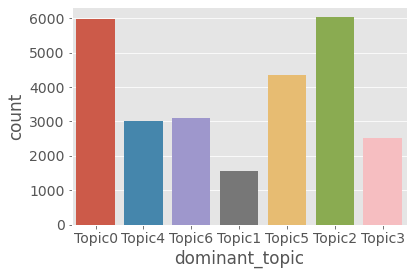

In [121]:
#Graficando distribuvcion de topicos
sns.countplot(df_sd['dominant_topic'])

In [450]:
df_document_topic.iloc[60:80]

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,dominant_topic,width_topic
Doc60,0.0250,0.0250,0.0250,0.8251,0.0250,0.0250,0.0250,0.0250,Topic3,0.8251
Doc61,0.0310,0.0310,0.0310,0.0310,0.4609,0.0310,0.0310,0.3531,Topic4,0.4609
Doc62,0.5065,0.0289,0.0288,0.0289,0.0289,0.3202,0.0289,0.0289,Topic0,0.5065
Doc63,0.0249,0.8257,0.0249,0.0249,0.0249,0.0249,0.0249,0.0249,Topic1,0.8257
Doc64,0.0416,0.0416,0.0416,0.0416,0.0416,0.0416,0.0416,0.7088,Topic7,0.7088
Doc65,0.0464,0.6753,0.0463,0.0466,0.0464,0.0463,0.0463,0.0464,Topic1,0.6753
Doc66,0.0276,0.0276,0.0276,0.4637,0.0276,0.0276,0.3708,0.0276,Topic3,0.4637
Doc67,0.0299,0.0299,0.0298,0.4868,0.1290,0.1238,0.0298,0.1411,Topic3,0.4868
Doc68,0.0323,0.0322,0.0322,0.0322,0.0322,0.0322,0.0323,0.7744,Topic7,0.7744
Doc69,0.4029,0.4258,0.0285,0.0285,0.0286,0.0285,0.0286,0.0285,Topic1,0.4258


In [451]:
#Obtenga las palabras clave de cada tema (Opcion)
# Topic - Keyword matrix
df_topic_keywords = pd.DataFrame(H)

# assign column and index
df_topic_keywords.columns = vectorizer_tfidf.get_feature_names()
df_topic_keywords.index = topicnames


# check the head
df_topic_keywords.iloc[:,:10]

,aaaa,aacun,aacunabloque,aacunaemail,aadjunt,aal,aalegri,aalegriabloque,aalegriaemail,aalfaroemail
Topic0,0.125000,0.125204,0.693723,0.125675,0.125000,0.128936,0.125000,1.634194,1.116555,0.125000
Topic1,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125030,0.125000,0.125000,0.125000
Topic2,0.125001,0.125000,0.125000,0.125001,0.588004,0.125001,0.125000,0.125000,0.125000,0.125000
Topic3,0.128730,0.125000,0.125000,0.695687,0.125000,0.127076,0.126708,0.125000,0.125000,0.125000
Topic4,0.446044,0.125000,0.125000,0.125001,0.125000,0.125087,0.125000,0.125000,0.125000,0.664092
Topic5,0.125001,1.113919,0.125000,0.126091,0.125000,0.125001,0.125000,0.125000,0.125000,0.125000
Topic6,0.125001,0.125000,0.125000,0.125000,0.125000,0.125001,0.125000,0.125000,0.125000,0.125000
Topic7,0.125000,0.125080,0.125000,0.125000,0.125112,0.307587,2.400951,1.026670,0.125000,0.125000


In [452]:
# Mostrat las top n palabras por topico
def show_topics(vectorizer=vectorizer_tfidf, component=H, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in component:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [453]:
topic_keywords = show_topics(vectorizer_tfidf, H, 15)

In [454]:
topic_keywords

[array(['reset', 'corre', 'anex', 'telefon', 'indic', 'incident',
        'descripcion', 'contraseñ', 'bloque', 'cambi', 'ubic', 'error',
        'email', 'red', 'desbloque'], dtype='<U77'),
 array(['oficin', 'envi', 'equip', 'gestion', 'recint', 'plant', 'adjunt',
        'direccion', 'despach', 'retir', 'gui', 'contact', 'tard',
        'requer', 'trabaj'], dtype='<U77'),
 array(['reset', 'exam', 'llam', 'mud', 'red', 'descripcion', 'desbloque',
        'clav', 'cambi', 'vivian', 'bloque', 'email', 'resetdescripcion',
        'preocupacional', 'corre'], dtype='<U77'),
 array(['acces', 'client', 'adjunt', 'ingres', 'transaccion', 'requer',
        'tard', 'esval', 'problem', 'sistem', 'inform', 'necesit', 'cre',
        'archiv', 'revis'], dtype='<U77'),
 array(['instal', 'aplic', 'sign', 'singl', 'qued', 'atent', 'suplenci',
        'sap', 'respald', 'firm', 'equip', 'sso', 'baj', 'gestion', 'tom'],
       dtype='<U77'),
 array(['vehicul', 'visit', 'camionet', 'terren', 'juev', 'viaj

In [455]:
# Topic - Keywords Dataframe
#Palabras mas dominantes por topicos
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,reset,corre,anex,telefon,indic,incident,descripcion,contraseñ,bloque,cambi,ubic,error,email,red,desbloque
Topic 1,oficin,envi,equip,gestion,recint,plant,adjunt,direccion,despach,retir,gui,contact,tard,requer,trabaj
Topic 2,reset,exam,llam,mud,red,descripcion,desbloque,clav,cambi,vivian,bloque,email,resetdescripcion,preocupacional,corre
Topic 3,acces,client,adjunt,ingres,transaccion,requer,tard,esval,problem,sistem,inform,necesit,cre,archiv,revis
Topic 4,instal,aplic,sign,singl,qued,atent,suplenci,sap,respald,firm,equip,sso,baj,gestion,tom
Topic 5,vehicul,visit,camionet,terren,juev,viaj,pta,miercol,sal,mart,hrs,llay,mañan,plan,mar
Topic 6,consult,ticket,inc,req,transitori,servici,corre,cas,insistent,extend,fech,telefon,sap,gerenci,cuent
Topic 7,reset,bloque,desbloque,descripcion,indic,cambi,vpn,contraseñ,corre,email,red,clav,telefon,anex,incident


In [472]:
#Definiendo Topicos
Topic=["Reset","cv","Incistencia","Creacion","e","Transporte","veh","e"]
#Topic=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77"]#,"Incidencia","Creación y/o modificación de cuentas"]
#Topic = ["Desbloqueo","Error de ubicacion","Solicitud de acceso","Despacho de equipo"]
df_topic_keywords["Topic"]=Topic
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topic
Topic 0,reset,corre,anex,telefon,indic,incident,descripcion,contraseñ,bloque,cambi,ubic,error,email,red,desbloque,Reset
Topic 1,oficin,envi,equip,gestion,recint,plant,adjunt,direccion,despach,retir,gui,contact,tard,requer,trabaj,cv
Topic 2,reset,exam,llam,mud,red,descripcion,desbloque,clav,cambi,vivian,bloque,email,resetdescripcion,preocupacional,corre,Incistencia
Topic 3,acces,client,adjunt,ingres,transaccion,requer,tard,esval,problem,sistem,inform,necesit,cre,archiv,revis,Creacion
Topic 4,instal,aplic,sign,singl,qued,atent,suplenci,sap,respald,firm,equip,sso,baj,gestion,tom,e
Topic 5,vehicul,visit,camionet,terren,juev,viaj,pta,miercol,sal,mart,hrs,llay,mañan,plan,mar,Transporte
Topic 6,consult,ticket,inc,req,transitori,servici,corre,cas,insistent,extend,fech,telefon,sap,gerenci,cuent,veh
Topic 7,reset,bloque,desbloque,descripcion,indic,cambi,vpn,contraseñ,corre,email,red,clav,telefon,anex,incident,e


# Probas modelo

In [474]:
#TRANSPORTE
#text="Estimados, Solicito a ustedes una camioneta entre las fechas indicadas en el formulario, con el motivo de asistir a una visita en terreno para el programa GROT en las plantas de Canela Alta, Canela Baja y los Vilos. Si hubiera la posibilidad de que esta fuera retirada en Viña del Mar les estaría mas que agradecido. Gracias por adelantado. Saludos, Andres Cordova M"
text="Se solicita vehículo para visita a plantas Hijuelas"# - Centenario - Oriente - Pachacama (La Cruz - Hijuelas)# con motivo de revisión de sistemas de dosificación de flúor y levantamiento GROT en San Jerónimo (San Antonio) Muchas gracias. Saludos.
#text="Estimados solicito trasladar camioneta KXXJ-26 desde recinto Uno Norte hacia recinto Bustamante #20, vehículo será trasladado por personal equipo de mantenimiento el Sr. Johan Blancheteau ."

#DESBLOQUEO DE CUENTAS 
#text="Desbloqueo/reset No puede conectarse a la vpnSolicitud/ incidente: No puede conectarse a vpn Nombres: Luis Alejandro Galleguillos GalleguillosAnexo / Telefono: 942427492Correo: lgalleguillos@aguasdelvalle.clUsuario: lgalleguillosBloqueo / reset: "
#text = "Nombre: Javier LeguaEmail: jlegua@esval.clUsuario: jleguaBloqueo/Reset: ResetDescripcion: usuario indica que le llego correo para cambio de contraseña "
#text = "Desbloqueo/reset Tiene el usuario bloqueadoSolicitud/ incidente:  desbloqueo de usuario Nombres: Roberto Enrique Stevenson AriasRut: 10889980-8Anexo / Telefono: 9929Correo: rstevenson@esval.clUsuario: Rstevenson Bloqueo / reset: Reset "
#text = "POR FAVOR NECESITO CLAVE DE ACCESO AL SIGEC, SE BLOQUEO"


#CREACION DE CUENTAS
#text = "Estimados, Solicitamos por favor de su apoyo en la extensión de la cuenta del practicante Nicole Saez C. - Práctica <nsaez.practica@esval.cl> hasta el 22 de julio de 2022Lo anterior es porque Nicoles realizará su memoria. Gracias!"



#text="Se requiere reponer o reparar tapas de wc de baños de "#hombres de 1"# norte"# Viña del Mar"
text = "Estimado favor se requiere reparación de llaves de jardín en oficina PTAS La Chimba, y por filtración. atte Constanza Oyanedel"

#text="Se solicita con urgencia sanitización de dos recintos (Baños) por rebase de AS"# asociado trabajo de mantenimiento con camión HIDROJET. SISDA: 2370793 Dirección: El Progreso # 791, Pob. Santa Rosa, La Calera Nombre Cliente: Patricio Ortiz Recintos: Dos recintos (Baños) de 4 m2 app cada uno. Contacto: Sr. Patricio Ortiz Cel, 966907131 Sra. Pamela Berrios (esposa)cel 91052280"
#text="puerta de baño mujeres no cierra, topa al marco no permite cerrar "

#Requerimiento
#text="Estimados.    Junto con saludar, solicito por favor la instalación de 4 dispensadores de alcohol gel para la Recinto PTAS Placilla. a cargo de Daniel Antilaf, ubicaciones, Laboratorio, Oficina Daniel Antilaf, Comedor, Sala reunión. enviare los registros fotográficos al grupo de Wsp. agradeciendo desde ya.  Me despido cordialmente.  Sebastián Troncoso Sinn"
#text = "Nombre: Carlos GallardoUsuario: cgallardoEmail: cgallardo@aguasdelvalle.clConsulta /Insistencia:Descripcion:"
#text="favor realizar gestión de retiro de equipamiento para : Usuario 	:claudio brionesdirección 	: pasaje Dagoberto Godoy El Bosque, Villa Alemanacontacto 	: +56 9 8995 6861 se adjunta guía  de despacho : retiro"

#TI - Creación y/o modificación de cuentas
#text="Buenos dias: Junto con saludar y desear que se encuentren bien. Solicito acceso a transacción me51n, esto con el fin de poder crear solicitudes de pedido con el fin de gestionar estados de pago a contratistas. Atenta a sus comentarios. Saludos Cordiales atte. María Victoria Nieto Urtubia"
#text = "Estimados necesito que le den acceso l personal del laboratorio de la SPAP Concón, ya que ellos son los encargado de la atención a clientes. Saludos Alicia"
#text="Estimados necesito que le den acceso l personal del laboratorio de la SPAP Concón, ya que ellos son los encargado de la atención a clientes. Saludos Alicia"


#DUDA
#text = "Muy buenos días. Se solicita factibilidad de entregar modem de internet, para ser utilizado en los recintos estratégicos de la empresa, con el fin de poder captar las imágenes de cámaras de video vigilancia que actualmente se mantiene, situación que complementa la seguridad de dichos lugares, permitiendo el monitoreo a distancia de dichos equipos y recintos. Los recintos estratégicos a que se hace referencia y que son fiscalizados por Carabineros de Chile serían: Recinto Las Delicias de Vicuña y Las Rojas en La Serena. Igualmente, conforme a las dimensiones de recintos y su importancia respecto de ubicación, producción y tratamiento, entre otros, se requiere mismo equipo (Modem para internet) para ser utilizado con el mismo fin, en cámaras de video vigilancia, en los siguientes recintos: Emisario de La Serena. Emisario de Guayacán en Coquimbo. Recinto Conchalí de Los Vilos. Recinto La Cantera sector Peñuelas Coquimbo. Totalidad de equipos requeridos: 7 Modem Internet. Los recintos señalados, no mantienen sistema que permita ser conectados a la red de la empresa, imposibilitando de esa forma el monitoreo a distancia de las imágenes de cámaras de vigilancia. Lo anterior es de gran importancia, debido a las fiscalizaciones que realiza la señalada autoridad de Carabineros y a la vez, mejora el sistema de seguridad en general. Los equipos deben ser enviados a esta Unidad de Seguridad con el objeto de realizar posterior instalación y funcionamiento, previa coordinación con personal del área respectiva. Atento a sus comentarios. Saludos cordiales. Ante consultas se puede realizar a mi persona o con Juan C. Pereira que trabaja en la Unidad de Seguridad Aguas del Valle (+569 79892389) Atte GERARDO A. ARAVENA PINILLA JEFE UNIDAD DE SEGURIDAD +56990306119"


#Incidente
#text="Junto con saludar, se solicita revisión de caso, cliente suscrito a boleta electrónica en la OV, no se ha reflejado en sistema"

#Correjido
#Incidente
#text = "Desbloqueo/reset No Solicitud/ incidente: No puede acceder a Outlook no ver archivos de excelNombres:Maria Teresa Ávalos AguileraAnexo / Teléfono: 0112449952429544Correo: mavalos@esval.cl	Usuario: mavalosBloqueo / reset: Reset Se reinicia equipo"
#text="Desbloqueo/reset No puede acceder a SAP Solicitud/ incidente: No tiene acceso a sap Nombres: Nazia Doménica Delaire CabadaAnexo / Telefono: 962697718Correo: ndelaire.st@aguasdelvalle.clUsuario: ndelaire"
#text="Nombre: Hipolito BarrazaCelular: 942891383 Correo: hbarrazab@esval.clUbicación: CasaUsuario: hbarrazabRut: 18580806-8Adjuntar Print Pantalla: N/aAny: 180215078Descripción: Usuario se comunica ya que no sabe como realizar proceso de carga en el sistema Sap"



#text = "Buenos dias, se ha enviado un articulo diferente al solicitado"
#text = "Buenos dias, Junto con saludar, busco solicitar camioneta para mañana miercoles 16/3 con motivo de visita a tranque la luz. De preferencia para retirar en Viña del Mar. La visita sera llevada a cabo de 9 a 14 hrs. Saludos, Javiera Cárdenas"
def infer(text):
    t = normalize(text)
    if(len(t)>1):
        #vectorizer_tfidf.transform(bag_of_wors_idf)
        #mt = vectorizer_tfidf.fit(t)
        mt = vectorizer_tfidf.transform(t)
        #print(mt)
        topic_probability_scores = model.transform(mt)
        x = pd.DataFrame(topic_probability_scores).mean(axis=0)

        topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),1:9].values.tolist()
        infer_topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),-1]
        #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topic]
        return infer_topic
    else:
        return ""
infer(text)

'Transporte'

# Utilidad extra

In [460]:
normalize("vehículo")

['vehicul']

In [341]:
df_sd

,Descripción,Description,largo,length,Tipo,text,dominant_topic,weightagt_topic
0,se solicita finalizar reposición de fecha 20-0...,se solicita finalizar reposición de fecha 20-0...,52,52,TI - Requerimiento,"[solicit, finaliz, reposicion, fech]",Topic4,0.6888
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,165,165,TI - Desbloqueo y/o Reinicio de Claves,"[nombr, daniel, rodriguezemail, reset, desbloq...",Topic0,0.4240
2,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,145,145,TI - Desbloqueo y/o Reinicio de Claves,"[jeny, vallej, rey, jvallej, movil, ubicacion,...",Topic0,0.6995
3,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,161,161,TI - Desbloqueo y/o Reinicio de Claves,"[nombr, gisell, carrascoemail, reset, resetdes...",Topic5,0.7511
4,Nombre: Carlos GallardoUsuario: cgallardoEmail...,Nombre: Carlos GallardoUsuario: cgallardoEmail...,109,109,TI - Requerimiento,"[nombr, carl, gallardousuari, cgallardoemail, ...",Topic5,0.7068
...,...,...,...,...,...,...,...,...
26477,"ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...","ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...",67,67,TI - Creación y/o modificación de cuentas,"[estim, favor, requier, usuari, sigec, cmorg, ...",Topic5,0.7105
26478,estimado envío solicitud para revisión de celu...,estimado envío solicitud para revisión de celu...,135,135,TI - Incidencia,"[estim, envi, solicitud, revision, celul, sams...",Topic1,0.5394
26479,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,232,232,TI - Desbloqueo y/o Reinicio de Claves,"[incident, usuari, indic, trat, acced, escrito...",Topic0,0.7005
26480,Descripción: Se solicita una Planta elevadora...,Descripción: Se solicita una Planta elevadora...,257,257,ADM - Reparaciones,"[descripcion, solicit, plant, elevador, tip, n...",Topic1,0.8270


In [1093]:
df_sd["TPC"] = [infer(txt) for txt in df_sd["Descripción"]]

In [1094]:
df_descarga=pd.DataFrame()
df_descarga["Descripcion"]=df_sd["Descripción"]
df_descarga["Tipo"]=df_sd["Tipo"]
df_descarga["TPC"]=df_sd["TPC"]

In [ ]:
df_sd["Descripción"][0]

df_sd["TPC"][0:10]

In [1095]:
exc = df_descarga.to_excel('output2.xlsx', engine='xlsxwriter')

In [1096]:
pickle.dump(bag_of_wors_idf, open("bag_of_7_V2_words.pk", 'wb'))

In [1992]:
pickle.dump(count_train_tfidf, open("count_vector.pk", 'wb'))

PicklingError: Can't pickle <function normalize at 0x0000020C25F148B0>: it's not the same object as __main__.normalize

In [1098]:
pickle.dump(vectorizer_tfidf.get_feature_names(), open("vocabulary_7_V2.pk", 'wb'))

In [1151]:
pickle.dump(model, open("LDA_7.pk", 'wb'))

In [1150]:
pickle.dump(lda_output2, open("LDA_2_7.pk", 'wb'))

In [455]:
#pickle.dump(bes, open("LDA_7_transform.pk", 'wb'))

,Descripción,Description,largo,length,text,dominant_topic,weightagt_topic
0,se solicita finalizar reposición de fecha 20-0...,se solicita finalizar reposición de fecha 20-0...,52,52,"[solicit, finaliz, reposicion, fech]",Topic1,0.6840
1,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,Nombre: Daniel RodriguezEmail: drodriguez.shcc...,165,165,"[nombr, daniel, rodriguezemail, reset, desbloq...",Topic0,0.5234
2,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,Jeny Vallejo Reyes\njvallejo@esval.cl\nJvallej...,145,145,"[jeny, vallej, rey, jvallej, movil, ubicacion,...",Topic4,0.4675
3,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,Nombre: Gisella CarrascoEmail: gcarrasco.incos...,161,161,"[nombr, gisell, carrascoemail, reset, resetdes...",Topic0,0.7442
4,Nombre: Carlos GallardoUsuario: cgallardoEmail...,Nombre: Carlos GallardoUsuario: cgallardoEmail...,109,109,"[nombr, carl, gallardousuari, cgallardoemail, ...",Topic0,0.6990
...,...,...,...,...,...,...,...
26477,"ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...","ESTIMADOS\n FAVOR REQUIERO USUARIO SIGEC, A LA...",67,67,"[estim, favor, requier, usuari, sigec, cmorg, ...",Topic6,0.7043
26478,estimado envío solicitud para revisión de celu...,estimado envío solicitud para revisión de celu...,135,135,"[estim, envi, solicitud, revision, celul, sams...",Topic1,0.5365
26479,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,\n\n\n\n\n\n\n\n\n\n\nSolicitud/ incidente: us...,232,232,"[incident, usuari, indic, trat, acced, escrito...",Topic0,0.6943
26480,Descripción: Se solicita una Planta elevadora...,Descripción: Se solicita una Planta elevadora...,257,257,"[descripcion, solicit, plant, elevador, tip, n...",Topic1,0.6468


In [459]:
#10 Palabras por topico en orden de relevancia 
top =[(-topic_weights).argsort()[:10] for topic_weights in H]
#print(top)
#Palabras en orden de relevancia
todo =[(-topic_weights).argsort() for topic_weights in H]
#print(len(todo[0]))
#words
keywords = np.array(vectorizer_tfidf.get_feature_names())
#print(keywords)

In [460]:
# Topic - Keyword matrix
df_topic_keywords = pd.DataFrame(H)

# asignando columnas e indices
df_topic_keywords.columns = vectorizer_tfidf.get_feature_names()
df_topic_keywords.index = topicnames

In [464]:
from itertools import groupby

words_text = df_sd['text']
print('help')
out = []
weight=[]


for i in range(len(top)):
  words=[x for x in top[i]]
  all_words=[x for x in todo[i]]
  #print(all_words)
  dictWords = {keywords.take(x):x for x in top[i]}
  valores =[y for y in dictWords.values()]
  for x in range(len(valores)):
    #out.append([,i,])
    #print(valores[x])
    word = list(dictWords.keys())[list(dictWords.values()).index(valores[x])]
    word_count = all_words.count(valores[x])
    #weight = df_topic_keywords[key_list[val_list.index(valores[x])]]
    weight = df_topic_keywords[list(dictWords.keys())[list(dictWords.values()).index(valores[x])]]
    total_words = [w.count(word) for w in df_sd['text']]
    total_words = sum(total_words)
    out.append([word,i,weight[i],total_words])
  #print(la)
  #print(key_list[val_list.index(valores[x])]) #palabras
  #print(valores[x]) #Id de palabra
  #print(all_words.count(valores[x])) #frecuencia
#out

help


In [465]:
df_date_top_words = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
df_date_top_words

,word,topic_id,importance,word_count
0,reset,0,769.430333,8925
1,corre,0,484.059116,7036
2,indic,0,456.284080,5990
3,descripcion,0,450.488850,4316
4,bloque,0,437.371992,3583
...,...,...,...,...
65,aplic,6,45.031768,1015
66,fech,6,36.716133,1010
67,ticket,6,35.225275,1709
68,dat,6,35.200906,968


In [466]:
#Guardando las palabras con su topico
words_topic=[]
#Recorre los topicos del dataframe
for i in range(len(df_date_top_words['topic_id'].unique())):
  #Recorre las palabras del dataframe
  for j in range(len(df_date_top_words['word'])):
    #Busca coincidencias entre los topicos y el dataframe
    if df_date_top_words['topic_id'][j] == i:
      #Guarda Las palabras dominantes en el texto con su respectivo topico
      words_topic.append([i,df_date_top_words['word'][j]])

In [469]:
#Buscar el top de palabras en el texto y las almacena por topico
def palabras(topic=0,numero=1):
  #Busca un texto en especifico del dataframe
  textos = df_sd['text'][numero]
  #variable para almacenar los resultados de la busqueda
  ar = []
  #Recorre las palabras del texto indicado
  for y in range(len(textos)):
    #recorre las palabras principales del texto
    for j,k in words_topic:
      #Comprueba que exista la palabra
      if k == textos[y]:
        #Guardando la palabra encontrada con su topico
        ar.append([textos[y],j])
  return ar

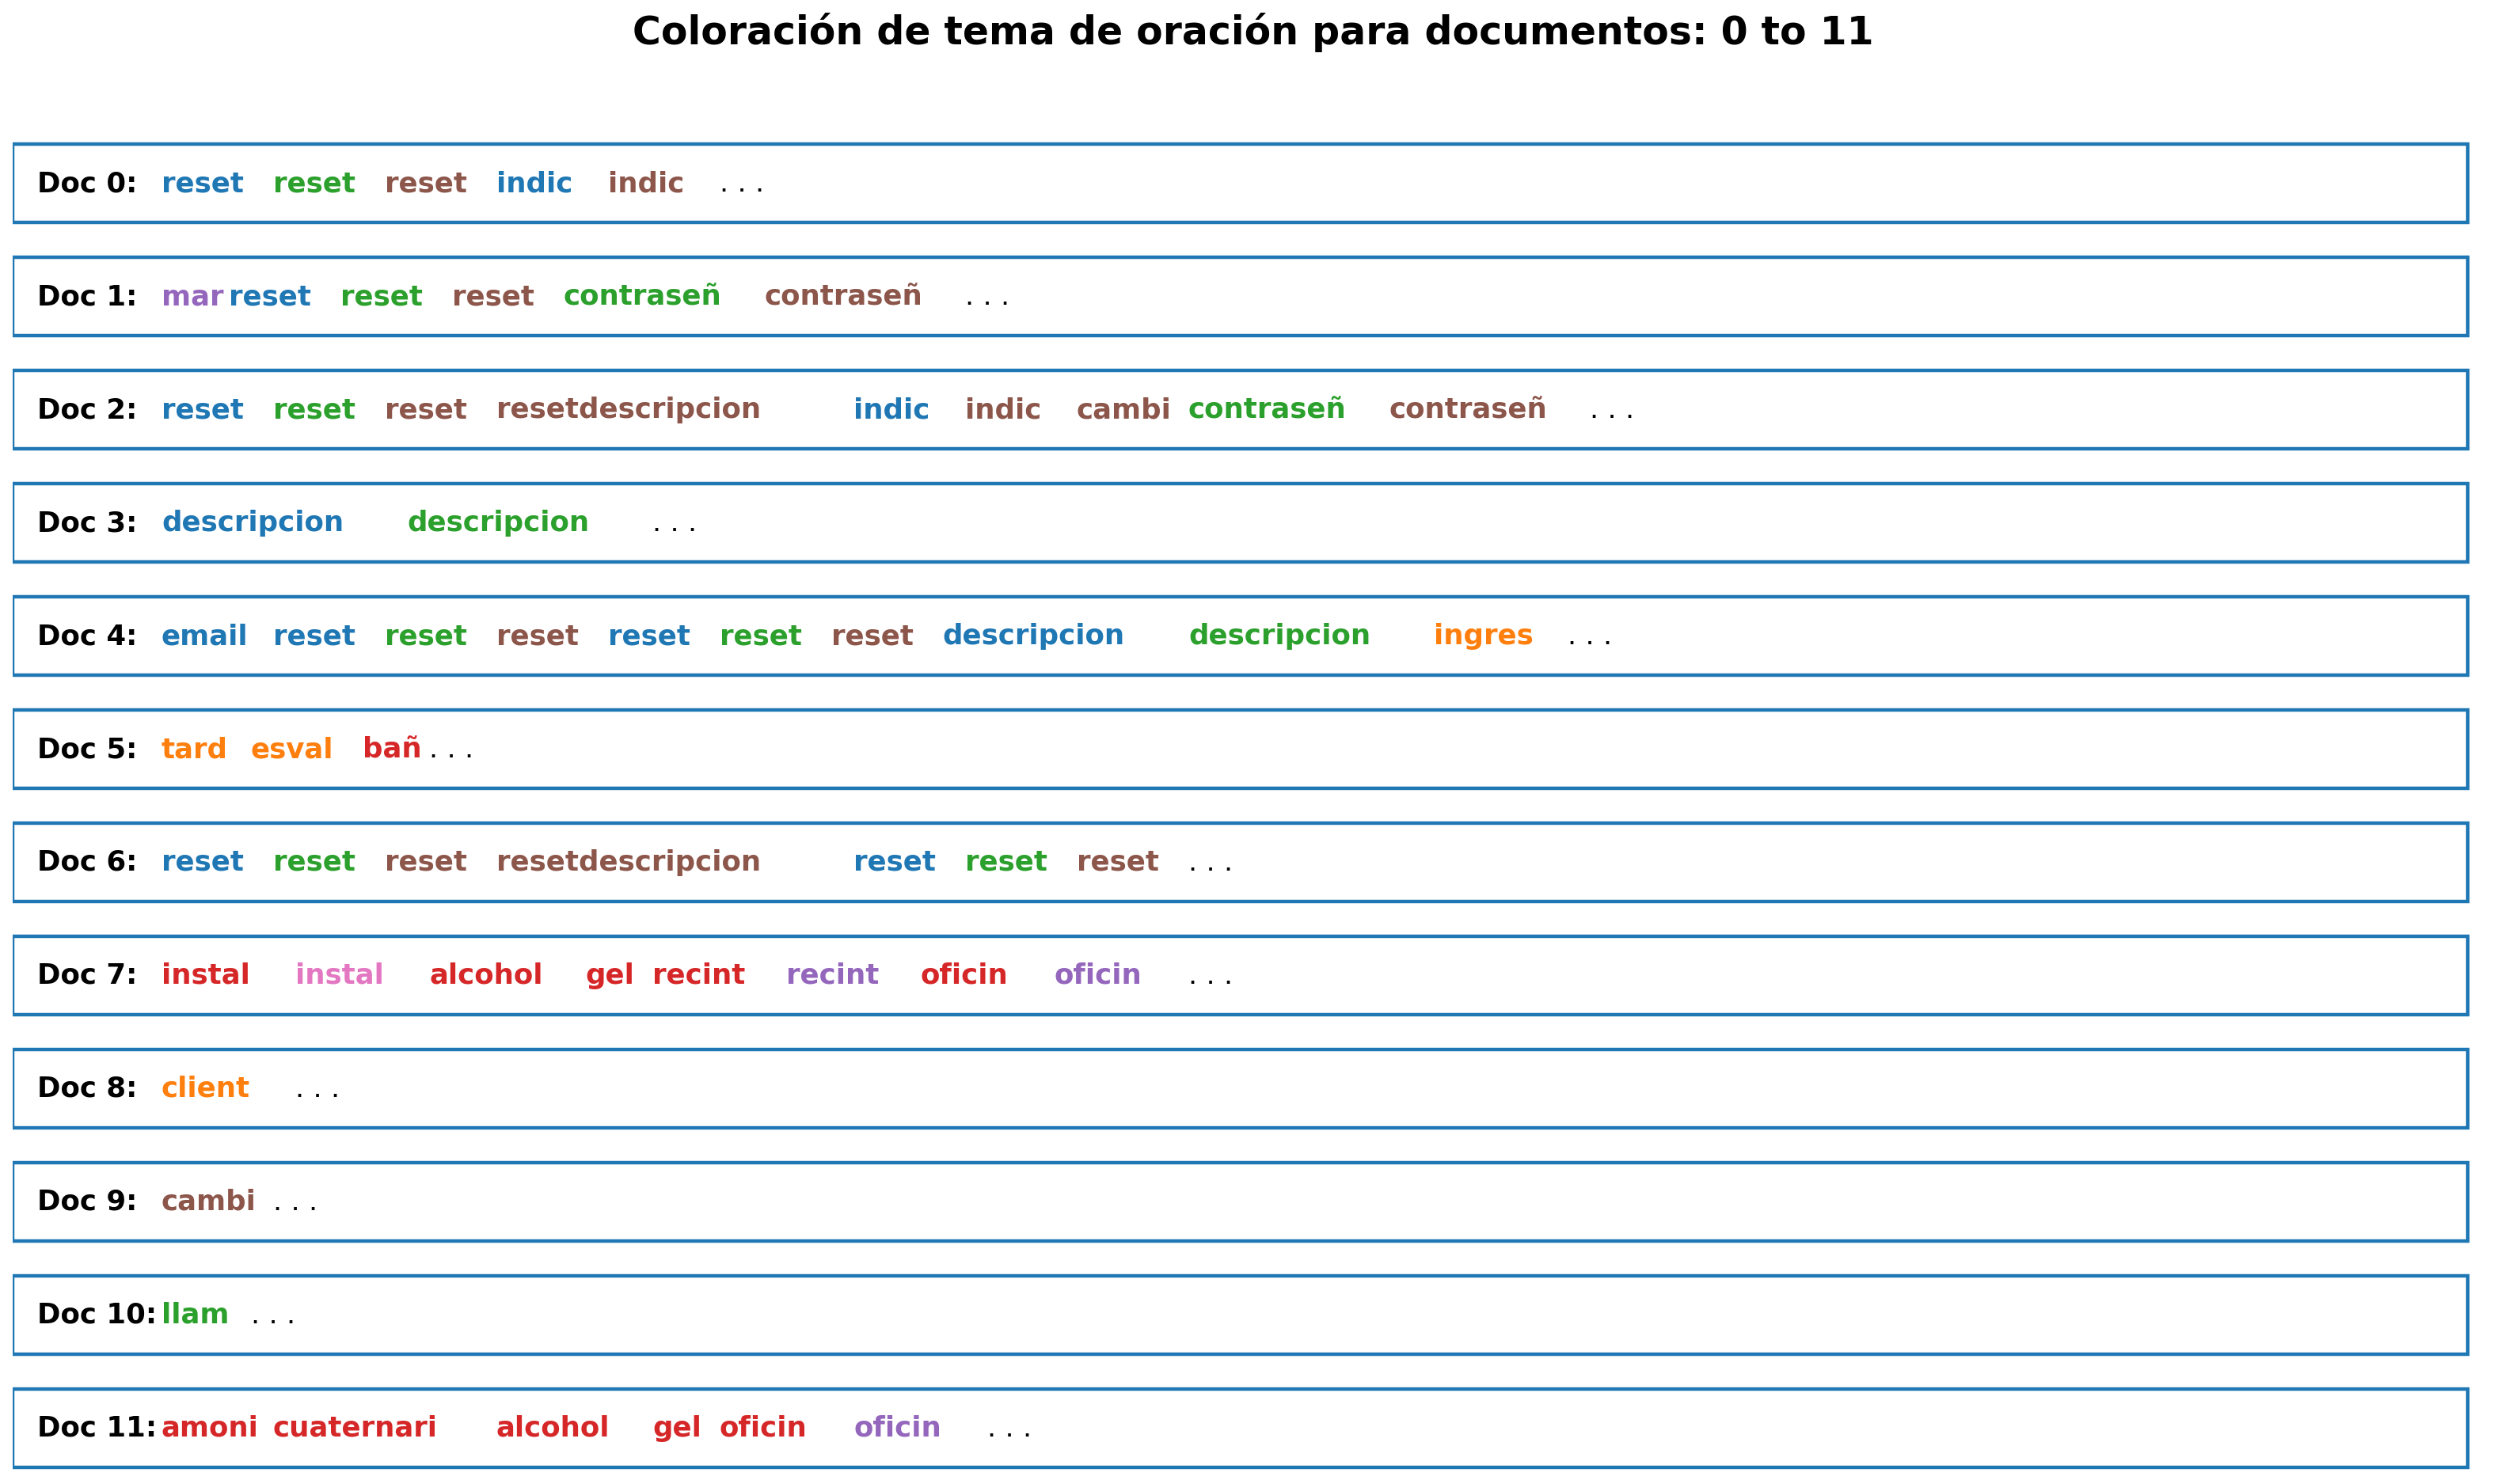

In [470]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
#topicos = len(df_date_top_words['topic_id'].unique())
#inicio y fin de los graficos
end = 13
start = 0
mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
axes[0].axis('off')
#Recorre los sublots
for i,ax in enumerate(axes):
  if i > 0:
    #Diccionario con los terminos mas relevantes de cada tema
    dictWords = {keywords.take(x):x for x in top[0]}
    #Palabraas dominantes en el tema
    word_dominanttopic = palabras(numero=i)
    ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
            fontsize=16, color='black', transform=ax.transAxes, fontweight=700)
    #almacena LAS probabilidades de los topicos en orden decendente
    topic_percs_sorted = sorted(W, key=lambda x: (x[1]), reverse=True)
    ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                          color=mycolors[int(topic_percs_sorted[0][0])], linewidth=2))
    word_pos = 0.06
    #Recoore las palabras dominantes en el texto buscando coincidencias
    for j,(word,topic) in enumerate(word_dominanttopic):
      #Indica el limite de palabras a mostrar
      if j < 10:
        ax.text(word_pos, 0.5, 
                word,horizontalalignment='left',
                verticalalignment='center',
                fontsize=16, color=mycolors[topic],
                transform=ax.transAxes, fontweight=700)
        #mueve la palabra a la siguiente iteracion
        word_pos += .009 * len(word) 
        ax.axis('off')

    ax.text(word_pos, 0.5, '. . .',
            horizontalalignment='left',
            verticalalignment='center',
            fontsize=16, color='black',
            transform=ax.transAxes) 

plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Coloración de tema de oración para documentos: ' + str(0) + ' to ' + str(13-2), fontsize=22, y=0.95, fontweight=700)
plt.tight_layout()
plt.show()

In [ ]:
#Cambio de contraseña
text="Nombre: Javier LeguaEmail: jlegua@esval.clUsuario: jleguaBloqueo/Reset: ResetDescripcion: usuario indica que le llego correo para cambio de contraseña "
#text = "Solicitud/ incidente: usuaria se comunica indicando que se encuentra en vacaciones y sus compañeros están tratado de acceder a su equipo y aplicación y la cuenta figura como bloqueada, se valida y dicha cuenta no esta bloqueada pero si se valida que se realizo un cambio e contraseña del 21-03-2021 la cual no fue realizado por la usuaria titular, se le indica a la usuaria la posibilidad del cambio de contraseña pero nos informa que no tiene a la mano el equipo, y consulta que si otra persona puede realizar el cambio de contraseña, se le indica que por políticas de seguridad el cambio debe ser realizado por el titular, usuaria realiza el comentario que si tiene que comunicarse con el gerente para que le puedan autorizar el cambio de contraseña por otra persona. Nombres: Jeny Vallejo R. Anexo/Teléfono: 942104078 correo: jvallejo@esval.cl Usuario: jvallejo Bloqueo/reset: NA"
#text = "Solicitud/ incidente: usuario solicita el cambio de contraseña de red, la cual expira en 7 días. Nombres: Carlos Valenzuela S. Anexo/Teléfono: 952374433 correo: cvalenzuelas@esval.cl Usuario: cvalenzuelas Bloqueo/reset: NA"

#text =  "Solicitud/ incidente: usuario solicita el cambio de contraseña de red, la cual expira en 7 días.     Nombres: Carlos Valenzuela S.   Anexo/Teléfono: 952374433 correo: cvalenzuelas@esval.cl Usuario: cvalenzuelas    Bloqueo/reset: NA"
#Requerimiento
#text = "favor realizar gestión de retiro de equipamiento para : Usuario 	:claudio brionesdirección 	: pasaje Dagoberto Godoy El Bosque, Villa Alemanacontacto 	: +56 9 8995 6861 se adjunta guía  de despacho : retiro"
#text = "favor realizar gestión para envío de equipamiento para : Usuario 	:MATIAS MELOdirección 	: 3 NORTE 1214 ESQUINA 5 ORIENTE DEPTO 33contacto 	: 966182620 se adjunta guía  de despacho : envío "
#text = "favor realizar gestión para envío de equipamiento para : Usuario 	:RAFAEL HERNANDEZ ISLAdirección 	: 1 NORTE 275contacto 	: +5699940868 se adjunta guía  de despacho : envío"


#text = "HOLA BUENAS TARDES A TODOS, AGRADECERE DISPONER ASEO MEJORADO EN EL SALON DE DIRECTORIO DE ESVAL Y EN EL BAÑO DE EJECUTIVOS DEL TERCER PISO, PARA EL DIA LUNES 28.03.2022, POR REUNION DE GERENTES PRESENCIAL A REALIZARSE A LAS 09:00 HRS., MIL GRACIAS,"
#Solicitud
#text = "Las teclas del teclado de PC CONCON0 no se ven debido al uso diario. Se solicita cambiar teclado."

#text="Estimados, se solicita mantención de cortina metálica, limpieza y engrase, estas se encuentran pesadas para subir y bajar. Por su pronta atención, muchas gracias. Viviana"

#text="Buenas Tardes Estimados Junto con saludar, por favor habilitar telefonos de supervisoras de Oficinas ya que se encuentran bloqueados  para realizar llamadas de cierre de gestiones. Solicito desbloqueo de números telefonicos. Ovalle 963995137 - 961314403Andacollo 961323281Illapel 963995805Monte Patria (incidencia  2022-004783) 998748174La Serena 976067678 Por favor su gestión lo antes posible  Gracias "

#text = "Estimados. Junto con saludar, solicito por favor la instalación de 4 dispensadores de alcohol gel para la Recinto PTAS Placilla. a cargo de Daniel Antilaf, ubicaciones, Laboratorio, Oficina Daniel Antilaf, Comedor, Sala reunión. enviare los registros fotográficos al grupo de Wsp. agradeciendo desde ya. Me despido cordialmente. Sebastián Troncoso Sinn"
#Cambio de contraseña
#text = "Buenos dias solicito un cambio de contraseña"
#Vehiculo de transporte
#text = "Solicito un vehiculo para la instalacion de un router en santiago iV region"
#text="Estimado favor solicito vehiculo de transporte gracias "
#text="Estimados, Solicitamos por favor de su apoyo en la extensión de la cuenta del practicante Nicole Saez C. - Práctica <nsaez.practica@esval.cl> hasta el 22 de julio de 2022Lo anterior es porque Nicoles realizará su memoria. Gracias!"

#Incidencia
#text = "Junto con saludar, se solicita verificar situación donde cliente se suscribe a boleta electrónica, y no se ha reflejado en sistema 4j."
#text = "Estimado, buena tarde. Esperando se encuentre bien, envío el presente para solicitar de su ayuda. Esto dado que la orden N° 278001, en el portal de factibilidades, no se puede finalizar. Al ingresar los datos y presionar el botón, el portal queda cargando eternamente y no avanza."
#text = "Estimado, buena tarde. Esperando se encuentre bien, envío el presente para solicitar de su ayuda. Esto dado que la orden N°  278001, en el portal de factibilidades, no se puede finalizar. Al ingresar los datos y presionar el botón, el portal queda cargando eternamente y no avanza."

#DUDA
#text="Se solicita cambio de mobiliario en comedor del segundo Piso La Calera. Se requiere: - cambio de mesas - cambio de sillas - cambio muebles de cocina Atte.: Claudio Aguilera"
#text="Buenas tardes: Junto con saludar solicito gestionar la entrega de nova para el secado de los vehículos de pool."
#text="Se solicita lo siguiente, Suministro e instalacion de 2 sillas + 2 escritorios en planta Los Peñones de Ovalle. 1 par debe quedar en oficina container de Venta de Agua a Granel, considerando la instalacion de tabique divisorio transparente para proteccion de COVID-19. El otro par, se definira si es factible instalar en dependencias de Casino o nuevo modulo container. Suministro e instalacion de 1 silla + 1 escritorio en planta tratamiento Salamanca. Debe quedar instalado en oficina container de Venta de Agua a Granel, considerando la instalacion de tabique divisorio transparente para proteccion de COVID-19. Saludos cordiales,"
#text="HOLA BUENAS TARDES A TODOS, AGRADECERE DISPONER ASEO MEJORADO EN EL SALON DE DIRECTORIO DE ESVAL Y EN EL BAÑO DE EJECUTIVOS DEL TERCER PISO, PARA EL DIA LUNES 28.03.2022, POR REUNION DE GERENTES PRESENCIAL A REALIZARSE A LAS 09:00 HRS., MIL GRACIAS,"
#Reparacion
#text="Se requiere cambiar tubo fluorescente quemado de baño 1 hombre primer piso recinto Bustamante."
#text="Reparación 2 aspersores."
#text="Se requiere cambiar dispensador de alcohol gel de entrada de guardia de Bustamante ya que este se encuentra roto."

text="se solicita cambio de dos tubos fluorescentes santa rosa 572 los andes lorena serrano 342494350"
   
#text = "Buenos dias, se ha enviado un articulo diferente al solicitado"

t = normalize(text)
mt = vectorizer_tfidf.transform(t)
#print(mt)
topic_probability_scores = best_lda_model.transform(mt)
x = pd.DataFrame(topic_probability_scores).mean(axis=0)

topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),1:9].values.tolist()
infer_topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),-1]
#topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topic]
infer_topic

In [ ]:
t

In [ ]:

spanishstemmer = SnowballStemmer('spanish')

#VECTORIZACION

#LIBRERIAS
from sklearn.feature_extraction.text import TfidfVectorizer

#Ajuste de parametros de vectorizacion
vectorizer_tfidf = TfidfVectorizer(
                      analyzer='word',
                      tokenizer= normalize,
                      lowercase= True,
                      stop_words=nlp.Defaults.stop_words,
                      min_df=0 #Elimina palabras que aparecen menos de 3 veces
                      ) #Elimina palabras que aparecen en el 95% de los textos

#El ajuste, realiza la normalizacion, eliminacion de stop-words y sin relevancia, ademas de crea el vocabulario.(Aplica los parametros establecidos)

def normalize(text):
    #Tokenizacion spacy
    doc = nlp(text)
    #Lemmatizacion | Eliminacion de caracteres |Eliminacion de palabras de parada
    words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
    #Texto a minusculas | Eliminacion de caracteres alfanumericos
    lexical_tokens = [t.lower() for t in words if len(t) > 2 and t.isalpha()]
    #Transformacion de numero a letras - Ingles
    #lexical_tokens=replace_numbers(lexical_tokens)
    #Elimina palabras que no se encuentran en el codigo ASCII
    #lexical_tokens=remove_non_ascii(lexical_tokens)
    #Stemmer
    stema = [spanishstemmer.stem(token) for token in lexical_tokens]
    return lexical_tokens

def predict(text):
    t = normalize(text)
    mt = vectorizer_tfidf.fit_transform(t)
    #print(mt)
    topic_probability_scores = best_lda_model.transform(mt)
    x = pd.DataFrame(topic_probability_scores).mean(axis=0)

    topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),1:9].values.tolist()
    infer_topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),-1]
    return infer_topic

In [ ]:
#predict("HOLA A TODOS COMO ESTAN?")
text = "Buenos dias solicito un cambio de contraseña"
t = normalize(text)
mt = vectorizer_tfidf.fit_transform(t)
topic_probability_scores = best_lda_model.transform(mt)

In [ ]:
#Distribución de frecuencia de conteos de palabras en documentos
#Al trabajar con una gran cantidad de documentos, desea saber qué tan grandes son los documentos en su conjunto y por tema. Tracemos la distribución de los recuentos de palabras del documento.

In [ ]:
doc_lens = [len(d) for d in df_sd.text]

# Plot
plt.figure(figsize=(16,7), dpi=200)
plt.hist(doc_lens, bins = 1000, color='navy')
#plt.text(750, 10, "Mean   : " + str(round(np.mean(doc_lens))))
#plt.text(750,  12, "Median : " + str(round(np.median(doc_lens))))
#plt.text(750,  14, "Stdev   : " + str(round(np.std(doc_lens))))
#plt.text(750,  16, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
#plt.text(750,  18, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 150), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,150,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
df_sd['width'] = df_document_topic.width_topic

In [ ]:
df_sd

In [ ]:
df_document_topic.shape

In [ ]:

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,1,figsize=(10,4), dpi=150)

for i, ax in enumerate(axes.flatten()):   
  #Identificando palabras temas en dataset 
  df_dominant_topic_sub = df_sd.loc[df_sd.dominant_topic == i, :]
  #Contando datos por tema
  doc_lens = [len(d) for d in df_sd.text]
  ax.hist(doc_lens, bins = 1000, color=cols[i])
  #ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
  sns.kdeplot(doc_lens, color="black", shade=False)
  ax.set( xlabel='Document Word Count')
  ax.set_ylabel('Number of Documents')#, color=cols[i])
  ax.set_title('Topic: '+str(i))#, fontdict=dict( color=cols[i]))

#fig.savefig('out.png', dpi=100)
#fig.tight_layout(h_pad=20,w_pad=10)
#fig.subplots_adjust(hspace=10,wspace=5)
#plt.xticks(np.linspace(10,1000,20))
#fig.suptitle('Distribution of Document Word Counts by Dominant Topic')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
%pip install wordcloud
#Nubes de palabras de las palabras clave N principales en cada tema
# 1. Wordcloud of Top N words in each topic

n_topic=15
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=nlp.Defaults.stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=n_topic,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)



fig, axes = plt.subplots(5, 1, figsize=(10,10), sharex=True, sharey=True)

#words
keywords = np.array(vectorizer_tfidf.get_feature_names())

#Palabras mas frecuentes por topico
top =[(-topic_weights).argsort()[:n_topic] for topic_weights in H]

for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  #Crear diccionario con palabras frecuentes
  dictWords = {keywords.take(x):x for x in top[i]}
  #Crear diccionario de palabras
  cloud.generate_from_frequencies(dictWords, max_font_size=300,)
  #Maquetar graficos de nube
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#Recuentos de palabras de palabras clave de tema
#10 Palabras por topico en orden de relevancia 
top =[(-topic_weights).argsort()[:10] for topic_weights in H]
#print(top)
#Palabras en orden de relevancia
todo =[(-topic_weights).argsort() for topic_weights in H]
#print(len(todo[0]))
#words
keywords = np.array(vectorizer_tfidf.get_feature_names())
#print(keywords)

In [ ]:
pip install streamlit

In [ ]:

%pip install gradio

In [ ]:



#import logging
#logger = spark._jvm.org.apache.log4j
#logging.getLogger("py4j.java_gateway").setLevel(logging.ERROR)




#show_predict_page()

#!streamlit run /databricks/python_shell/scripts/PythonShell.py

In [ ]:
!ls 

In [1863]:
nlp.Defaults.stop_words.add("nombre")
nlp.Defaults.stop_words.add("nombr")
nlp.Defaults.stop_words.add("hola")
nlp.Defaults.stop_words.add("usuario")
nlp.Defaults.stop_words.add("usuari")
nlp.Defaults.stop_words.add("usuaria")
nlp.Defaults.stop_words.add("saludo")
nlp.Defaults.stop_words.add("saludar")
nlp.Defaults.stop_words.add("gracias")
nlp.Defaults.stop_words.add("gracia")
nlp.Defaults.stop_words.add("graci")
nlp.Defaults.stop_words.add("adjuntar")
nlp.Defaults.stop_words.add("favor")
nlp.Defaults.stop_words.add("gracia")
nlp.Defaults.stop_words.add("solicita")
nlp.Defaults.stop_words.add("solicito")
nlp.Defaults.stop_words.add("solicit")
nlp.Defaults.stop_words.add("cccccc")
nlp.Defaults.stop_words.add("saludo")
nlp.Defaults.stop_words.add("salud")
nlp.Defaults.stop_words.add("estimado")
nlp.Defaults.stop_words.add("estimada")
nlp.Defaults.stop_words.add("estim")
nlp.Defaults.stop_words.add("santo")
nlp.Defaults.stop_words.add("santiago")
nlp.Defaults.stop_words.add("viña")
nlp.Defaults.stop_words.add("sant")
nlp.Defaults.stop_words.add("viñ")
nlp.Defaults.stop_words.add("san")
nlp.Defaults.stop_words.add("sant")
nlp.Defaults.stop_words.remove("cambio")
nlp.Defaults.stop_words.remove("cambi")

In [1967]:
vectorizer_tfidf = TfidfVectorizer(
                      analyzer='word',
                      tokenizer= normalize,
                      lowercase= True,
                      stop_words=nlp.Defaults.stop_words,
                      min_df=1, #Elimina palabras que aparecen menos de 3 veces
                      max_df=0.98)

#dtm = vectorizer_tfidf.fit_transform(df_sd["Descripción"])
count_train_tfidf = vectorizer_tfidf.fit(df_sd["Descripción"])


C:\Users\farayal\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\farayal\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adjunt', 'hol', 'santiag'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [1998]:
#dtm.ba
count_train_tfidf = vectorizer_tfidf.fit(df_sd["Descripción"])

array([10.08564601, 10.08564601, 10.49111112, ..., 10.49111112,
       10.08564601, 10.49111112])

In [1969]:
dtm=vectorizer_tfidf.transform(df_sd['Descripción'])

In [1970]:
LDA = LatentDirichletAllocation(learning_decay=0.5, n_components=8, n_jobs=-1,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(learning_decay=0.5, n_components=8, n_jobs=-1,
                          random_state=42)

In [1971]:
#Tema dominante en el texto
k = LDA.n_components
# obtener el modelo que generamos anteriormente.
#W = topic_models[5][1]
#H = topic_models[5][2] 
W = LDA.transform(dtm)#best_lda_model.transform(bag_of_wors_idf)
H = LDA.components_#best_lda_model.components_


In [1972]:
#Nombre de columnas
topicnames = []
for i in range(len(H)):#best_lda_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [1973]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(len(W)):
    docnames.append('Doc'+str(i))

In [1974]:
df_document_topic=pd.DataFrame(np.round(W,4),columns=topicnames,index=docnames)
maximo = df_document_topic.max(axis=1)
id_maximo = df_document_topic.idxmax(axis=1)
df_document_topic['dominant_topic'] = id_maximo
df_document_topic['width_topic'] = maximo

In [1975]:
#Obtenga las palabras clave de cada tema (Opcion)
# Topic - Keyword matrix
df_topic_keywords = pd.DataFrame(H)

# assign column and index
df_topic_keywords.columns = vectorizer_tfidf.get_feature_names()
df_topic_keywords.index = topicnames

In [1976]:
# Mostrat las top n palabras por topico
def show_topics(vectorizer=vectorizer_tfidf, component=H, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in component:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [1977]:
topic_keywords = show_topics(vectorizer_tfidf, H, 15)
len(topic_keywords[0])

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

#ta = nlp("acceso")
#words = [t.lemma_ for t in ta if not t.is_punct | t.is_stop]
#lexical_tokens = [t.lower() for t in words if len(t) > 2 and t.isalpha()]
#stema = [spanishstemmer.stem(token) for token in lexical_tokens]
#stema
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,acces,adjunt,tard,problem,client,requer,equip,ingres,transaccion,cre,inform,qued,necesit,esval,sistem
Topic 1,reset,bloque,corre,telefon,anex,incident,desbloque,contraseñ,cambi,descripcion,email,red,indic,vpn,ubic
Topic 2,reset,descripcion,email,clav,cambi,bloque,desbloque,indic,red,pdf,present,error,dibuj,plan,deud
Topic 3,consult,llam,ticket,inc,req,cort,insistent,indic,descripcion,ubic,sap,anex,corre,telefon,ext
Topic 4,reset,indic,corre,contraseñ,descripcion,cambi,bloque,vpn,anex,telefon,incident,error,desbloque,red,clav
Topic 5,respald,baj,tom,gestion,instal,atent,acces,qued,adicional,retir,report,fall,form,pea,aplic
Topic 6,vehicul,visit,servici,fech,retir,camionet,terren,solicitud,transitori,gestion,extend,cuent,juev,lun,requer
Topic 7,sign,singl,recint,alcohol,gel,oficin,bañ,instal,repar,aplic,plant,amoni,ubic,cuaternari,bodeg


In [1978]:
Topic=["Creacion de Cuenta","Requerimiento","2","3","Cambio de Contraseña","Transporte","5","4"]#,"Incidencia","Creación y/o modificación de cuentas"]
#Topic = ["Desbloqueo","Error de ubicacion","Solicitud de acceso","Despacho de equipo"]
df_topic_keywords["Topic"]=Topic


In [1979]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topic
Topic 0,acces,adjunt,tard,problem,client,requer,equip,ingres,transaccion,cre,inform,qued,necesit,esval,sistem,Creacion de Cuenta
Topic 1,reset,bloque,corre,telefon,anex,incident,desbloque,contraseñ,cambi,descripcion,email,red,indic,vpn,ubic,Requerimiento
Topic 2,reset,descripcion,email,clav,cambi,bloque,desbloque,indic,red,pdf,present,error,dibuj,plan,deud,2
Topic 3,consult,llam,ticket,inc,req,cort,insistent,indic,descripcion,ubic,sap,anex,corre,telefon,ext,3
Topic 4,reset,indic,corre,contraseñ,descripcion,cambi,bloque,vpn,anex,telefon,incident,error,desbloque,red,clav,Cambio de Contraseña
Topic 5,respald,baj,tom,gestion,instal,atent,acces,qued,adicional,retir,report,fall,form,pea,aplic,Transporte
Topic 6,vehicul,visit,servici,fech,retir,camionet,terren,solicitud,transitori,gestion,extend,cuent,juev,lun,requer,5
Topic 7,sign,singl,recint,alcohol,gel,oficin,bañ,instal,repar,aplic,plant,amoni,ubic,cuaternari,bodeg,4


In [1980]:
#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(W,4),columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(transform_lda,columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(lda_output,columns=topicnames,index=docnames)
maximo = df_document_topic.max(axis=1)
id_maximo = df_document_topic.idxmax(axis=1)
df_document_topic['dominant_topic'] = id_maximo
df_document_topic['width_topic'] = maximo
df_document_topic
#Guardar tema dominante en df inicial
df_sd['dominant_topic']=id_maximo
df_sd['weightagt_topic']=maximo


In [1981]:
df["Tipo"].unique()

array(['TI - Requerimiento', 'TI - Desbloqueo y/o Reinicio de Claves',
       'ADM - Reparaciones', 'ADM - Requerimientos', 'TI - Incidencia',
       nan, 'TI - Creación y/o modificación de cuentas',
       'ADM - Vehículos Para Transporte', 'PREV - Requerimientos',
       'ADM - Compras', 'TI - Soporte ', 'ING - Proyectos',
       'REQ - UNegocios', 'TI - Trabajo Administrativo', 'TI - RFC',
       'TI - Solicitud Minutos y Megas Adicionales', 'PREV - Incidentes'],
      dtype=object)

C:\Users\farayal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tipo', ylabel='count'>

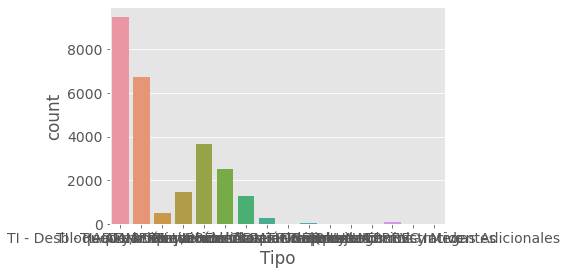

In [1982]:
sns.countplot(df["Tipo"])

In [1983]:
df_document_topic.shape

(26482, 10)

C:\Users\farayal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dominant_topic', ylabel='count'>

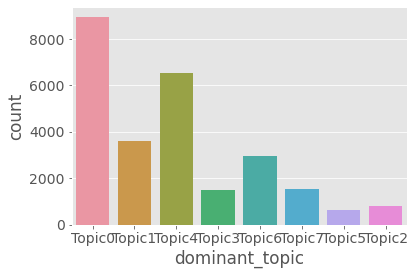

In [1984]:
sns.countplot(df_document_topic['dominant_topic'])

In [1985]:
#Cambio de contraseña
#text="Nombre: Javier LeguaEmail: jlegua@esval.clUsuario: jleguaBloqueo/Reset: ResetDescripcion: usuario indica que le llego correo para cambio de contraseña "
#text = "Solicitud/ incidente: usuaria se comunica indicando que se encuentra en vacaciones y sus compañeros están tratado de acceder a su equipo y aplicación y la cuenta figura como bloqueada, se valida y dicha cuenta no esta bloqueada pero si se valida que se realizo un cambio e contraseña del 21-03-2021 la cual no fue realizado por la usuaria titular, se le indica a la usuaria la posibilidad del cambio de contraseña pero nos informa que no tiene a la mano el equipo, y consulta que si otra persona puede realizar el cambio de contraseña, se le indica que por políticas de seguridad el cambio debe ser realizado por el titular, usuaria realiza el comentario que si tiene que comunicarse con el gerente para que le puedan autorizar el cambio de contraseña por otra persona. Nombres: Jeny Vallejo R. Anexo/Teléfono: 942104078 correo: jvallejo@esval.cl Usuario: jvallejo Bloqueo/reset: NA"
#text = "Solicitud/ incidente: usuario solicita el cambio de contraseña de red, la cual expira en 7 días. Nombres: Carlos Valenzuela S. Anexo/Teléfono: 952374433 correo: cvalenzuelas@esval.cl Usuario: cvalenzuelas Bloqueo/reset: NA"
#text =  "Solicitud/ incidente: usuario solicita el cambio de contraseña de red, la cual expira en 7 días.     Nombres: Carlos Valenzuela S.   Anexo/Teléfono: 952374433 correo: cvalenzuelas@esval.cl Usuario: cvalenzuelas    Bloqueo/reset: NA"

#Requerimiento
#text = "favor realizar gestión de retiro de equipamiento para : Usuario 	:claudio brionesdirección 	: pasaje Dagoberto Godoy El Bosque, Villa Alemanacontacto 	: +56 9 8995 6861 se adjunta guía  de despacho : retiro"
#text = "favor realizar gestión para envío de equipamiento para : Usuario 	:MATIAS MELOdirección 	: 3 NORTE 1214 ESQUINA 5 ORIENTE DEPTO 33contacto 	: 966182620 se adjunta guía  de despacho : envío "
#text = "favor realizar gestión para envío de equipamiento para : Usuario 	:RAFAEL HERNANDEZ ISLAdirección 	: 1 NORTE 275contacto 	: +5699940868 se adjunta guía  de despacho : envío"

#Solicitud
#text = "HOLA BUENAS TARDES A TODOS, AGRADECERE DISPONER ASEO MEJORADO EN EL SALON DE DIRECTORIO DE ESVAL Y EN EL BAÑO DE EJECUTIVOS DEL TERCER PISO, PARA EL DIA LUNES 28.03.2022, POR REUNION DE GERENTES PRESENCIAL A REALIZARSE A LAS 09:00 HRS., MIL GRACIAS,"
#text = "Se solicita cambio de teclado"#"Las teclas del teclado de PC no se ven debido al uso diario."#" Se solicita cambiar teclado."
#text="Estimados, se solicita mantención de cortina metálica, limpieza y engrase, estas se encuentran pesadas para subir y bajar. Por su pronta atención, muchas gracias. Viviana"
#text="Buenas Tardes Estimados Junto con saludar, por favor habilitar telefonos de supervisoras de Oficinas ya que se encuentran bloqueados  para realizar llamadas de cierre de gestiones. Solicito desbloqueo de números telefonicos. Ovalle 963995137 - 961314403Andacollo 961323281Illapel 963995805Monte Patria (incidencia  2022-004783) 998748174La Serena 976067678 Por favor su gestión lo antes posible  Gracias "
#text = "Estimados. Junto con saludar, solicito por favor la instalación de 4 dispensadores de alcohol gel para la Recinto PTAS Placilla. a cargo de Daniel Antilaf, ubicaciones, Laboratorio, Oficina Daniel Antilaf, Comedor, Sala reunión. enviare los registros fotográficos al grupo de Wsp. agradeciendo desde ya. Me despido cordialmente. Sebastián Troncoso Sinn"

#Cambio de contraseña
#text = "Buenos dias solicito un cambio de contraseña"


#Vehiculo de transporte
#text = "Solicito un vehiculo para la instalacion de un router en santiago iV region"
#text="Estimado favor solicito vehiculo de transporte gracias "
#text="Estimados, Solicitamos por favor de su apoyo en la extensión de la cuenta del practicante Nicole Saez C. - Práctica <nsaez.practica@esval.cl> hasta el 22 de julio de 2022Lo anterior es porque Nicoles realizará su memoria. Gracias!"

#Incidencia
#text = "Junto con saludar, se solicita verificar situación donde cliente se suscribe a boleta electrónica, y no se ha reflejado en sistema 4j."
#text = "Estimado, buena tarde. Esperando se encuentre bien, envío el presente para solicitar de su ayuda. Esto dado que la orden N° 278001, en el portal de factibilidades, no se puede finalizar. Al ingresar los datos y presionar el botón, el portal queda cargando eternamente y no avanza."
#text = "Estimado, buena tarde. Esperando se encuentre bien, envío el presente para solicitar de su ayuda. Esto dado que la orden N°  278001, en el portal de factibilidades, no se puede finalizar. Al ingresar los datos y presionar el botón, el portal queda cargando eternamente y no avanza."

#DUDA
#text="Se solicita cambio de mobiliario en comedor del segundo Piso La Calera. Se requiere: - cambio de mesas - cambio de sillas - cambio muebles de cocina Atte.: Claudio Aguilera"
#text="Buenas tardes: Junto con saludar solicito gestionar la entrega de nova para el secado de los vehículos de pool."
#text="Se solicita lo siguiente, Suministro e instalacion de 2 sillas + 2 escritorios en planta Los Peñones de Ovalle. 1 par debe quedar en oficina container de Venta de Agua a Granel, considerando la instalacion de tabique divisorio transparente para proteccion de COVID-19. El otro par, se definira si es factible instalar en dependencias de Casino o nuevo modulo container. Suministro e instalacion de 1 silla + 1 escritorio en planta tratamiento Salamanca. Debe quedar instalado en oficina container de Venta de Agua a Granel, considerando la instalacion de tabique divisorio transparente para proteccion de COVID-19. Saludos cordiales,"
#text="HOLA BUENAS TARDES A TODOS, AGRADECERE DISPONER ASEO MEJORADO EN EL SALON DE DIRECTORIO DE ESVAL Y EN EL BAÑO DE EJECUTIVOS DEL TERCER PISO, PARA EL DIA LUNES 28.03.2022, POR REUNION DE GERENTES PRESENCIAL A REALIZARSE A LAS 09:00 HRS., MIL GRACIAS,"
#Reparacion
#text="Se requiere cambiar tubo fluorescente quemado de baño 1 hombre primer piso recinto Bustamante."
#text="Reparación 2 aspersores."
#text="Se requiere cambiar dispensador de alcohol gel de entrada de guardia de Bustamante ya que este se encuentra roto."

#text="se solicita cambio de dos tubos fluorescentes santa rosa 572 los andes lorena serrano 342494350"
#text = "Buenos dias, se ha enviado un articulo diferente al solicitado"

#text="Buenos dias: Junto con saludar y desear que se encuentren bien. Solicito acceso a transacción me51n, esto con el fin de poder crear solicitudes de pedido con el fin de gestionar estados de pago a contratistas. Atenta a sus comentarios. Saludos Cordiales atte. María Victoria Nieto Urtubia"



In [1986]:
#VECTORIZACION
spanishstemmer = SnowballStemmer('spanish')
def normalize(text):
  #Tokenizacion spacy
  doc = nlp(text)
  #Lemmatizacion | Eliminacion de caracteres |Eliminacion de palabras de parada
  words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
  #Texto a minusculas | Eliminacion de caracteres alfanumericos
  lexical_tokens = [t.lower() for t in words if len(t) > 2 and t.isalpha()]
  #Transformacion de numero a letras - Ingles
  #lexical_tokens=replace_numbers(lexical_tokens)
  #Elimina palabras que no se encuentran en el codigo ASCII
  #lexical_tokens=remove_non_ascii(lexical_tokens)
  #Stemmer
  stema = [spanishstemmer.stem(token) for token in lexical_tokens]
  return stema
import nltk
spanish_stemmer = nltk.stem.SnowballStemmer('spanish')

In [1987]:
 def infer(text):
    t = normalize(text)
    if(len(t)>1):
        #vectorizer_tfidf.transform(t)
        #t = vectorizer_tfidf.fit(t)
        mt = count_train_tfidf.transform(t)
        #print(mt)
        topic_probability_scores = LDA.transform(mt)
        x = pd.DataFrame(topic_probability_scores).mean(axis=0)

        #topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),1:9].values.tolist()
        infer_topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),-1]
        #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topic]
        return infer_topic
    else:
        return ""
infer(text)

'Creacion de Cuenta'

In [1988]:
#vocabulary=count_train_tfidf.get_feature_names()

In [1989]:
pickle.dump(dtm, open("bag_of_words_7_topics.pk", 'wb'))

In [1990]:
pickle.dump(count_train_tfidf.get_feature_names(), open("vocabulary_7_topics.pk", 'wb'))

In [1991]:
pickle.dump(LDA, open("LDA_7_topics.pk", 'wb'))

In [1996]:
pickle.dump(count_train_tfidf., open("count_7_topics.pk", 'wb'))

PicklingError: Can't pickle <function normalize at 0x0000020C25F148B0>: it's not the same object as __main__.normalize

PicklingError: Can't pickle <function normalize at 0x0000020C21CEBA60>: it's not the same object as __main__.normalize

In [1934]:

pickle.dump(dtm, open("dtm_7_topics.pk", 'wb'))

In [1919]:
LDA

LatentDirichletAllocation(learning_decay=0.5, n_components=8, n_jobs=-1,
                          random_state=42)

In [1932]:
 def infer(text):
    t = normalize(text)
    if(len(t)>1):
        #vectorizer_tfidf.transform(t)
        #t = vectorizer_tfidf.fit(t)
        mt = count_train_tfidf.transform(t)
        #print(mt)
        topic_probability_scores = LDA.transform(mt)
        x = pd.DataFrame(topic_probability_scores).mean(axis=0)

        #topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),1:9].values.tolist()
        infer_topic = df_topic_keywords.iloc[np.argmax(pd.DataFrame(topic_probability_scores).mean(axis=0)),-1]
        #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topic]
        return infer_topic
    else:
        return ""
infer(text)

ValueError: X has 20845 features, but LatentDirichletAllocation is expecting 16630 features as input.